1. Dataset Overview:
The dataset consists of data about fraud in transactions.
It contains information about transfers,payments, amount, old and new balance and whether it is fraud of not.
2. Understanding the Structure:
The dataset has  669525 rows and 13 columns
Columns include 'step', 'type’', 'amount’', ‘name_orig', 'old_balance_orig', 'new_balance_orig', 'name_dest', and 'old_balance_dest', ‘new_balance_dest’ etc
Most columns are of float type except 3 columns which are object.
3. Data Cleaning:
Missing Values: There were 1 each missing values in each column in the dataset, they are removed
Duplicate Rows:  duplicate rows were found and removed from the dataset.
4. Univariate Analysis:
new_balance_orig: The new_balance_orig of customers is skewed to the right.


**Dataset description**

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Exploratory Data Analysis**

In [ ]:
df=pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Unnamed: 11,Unnamed: 12
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,NaN,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,NaN,1047433.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,NaN,1142.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,NaN,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155404,12,TRANSFER,3064182.39,C1654306879,10053.0,0.00,C420784425,0.00,3064182.39,0.0,0.0,NaN,NaN
155405,12,CASH_OUT,92693.76,C1518219457,0.0,0.00,C1484055055,501466.00,594159.76,0.0,0.0,NaN,NaN
155406,12,CASH_OUT,415869.06,C1390731628,0.0,0.00,C1816201398,1205025.26,1620894.32,0.0,0.0,NaN,NaN
155407,12,CASH_OUT,77606.94,C1323499299,10587.0,0.00,C2110372509,0.00,77606.94,0.0,0.0,NaN,NaN


In [ ]:
df.head(10) #top 10 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Unnamed: 11,Unnamed: 12
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0,NaN,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0,NaN,1047433.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0,NaN,1142.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0,NaN,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0,NaN,NaN
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0,NaN,NaN
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0,NaN,NaN
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0,NaN,NaN
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0,NaN,NaN
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0,NaN,NaN


In [ ]:
df.tail(10) #last 10 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
158796,12,CASH_IN,109358.17,C1323092438,693173.69,802531.86,C1030640525,567201.73,0.00,0.0,0.0
158797,12,CASH_IN,27234.50,C1961770898,802531.86,829766.36,C727099944,205269.00,246183.53,0.0,0.0
158798,12,CASH_IN,252975.04,C1011190045,829766.36,1082741.40,C114891172,1424546.78,1171571.74,0.0,0.0
158799,12,CASH_OUT,289653.63,C629756320,19566.00,0.00,C38549993,0.00,1200150.04,0.0,0.0
158800,12,PAYMENT,8419.19,C229879486,65663.00,57243.81,M144970293,0.00,0.00,0.0,0.0
158801,12,PAYMENT,8226.64,C406421341,249478.03,241251.39,M2010266027,0.00,0.00,0.0,0.0
158802,12,CASH_OUT,300328.35,C1736748977,241251.39,0.00,C708232604,1313688.45,2361567.14,0.0,0.0
158803,12,CASH_IN,551362.67,C1335442638,1203329.30,1754691.97,C1849840526,141187.62,6309495.47,0.0,0.0
158804,12,CASH_OUT,104165.29,C470381047,1754691.97,1650526.68,C216070092,711850.72,816016.01,0.0,0.0
158805,12,CASH_IN,42688.10,C2062556348,104123.00,146811.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns #columns of the dataset

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 11', 'Unnamed: 12']) #we have dropped two columns (Unnamed: 11' and 'Unnamed: 12')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
155404,12,TRANSFER,3064182.39,C1654306879,10053.0,0.00,C420784425,0.00,3064182.39,0.0,0.0
155405,12,CASH_OUT,92693.76,C1518219457,0.0,0.00,C1484055055,501466.00,594159.76,0.0,0.0
155406,12,CASH_OUT,415869.06,C1390731628,0.0,0.00,C1816201398,1205025.26,1620894.32,0.0,0.0
155407,12,CASH_OUT,77606.94,C1323499299,10587.0,0.00,C2110372509,0.00,77606.94,0.0,0.0


In [ ]:
df=df.rename(columns={'nameOrig':'name_orig','oldbalanceOrg':'old_balance_orig','newbalanceOrig':'new_balance_orig','nameDest':'name_dest','oldbalanceDest':'old_balance_dest','newbalanceDest':'new_balance_dest',
                   'isFraud':'is_fraud','isFlaggedFraud':'is_flagged_fraud'}) #this is used to data clean the variables and standardize them in lower cases
df

,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
155404,12,TRANSFER,3064182.39,C1654306879,10053.0,0.00,C420784425,0.00,3064182.39,0.0,0.0
155405,12,CASH_OUT,92693.76,C1518219457,0.0,0.00,C1484055055,501466.00,594159.76,0.0,0.0
155406,12,CASH_OUT,415869.06,C1390731628,0.0,0.00,C1816201398,1205025.26,1620894.32,0.0,0.0
155407,12,CASH_OUT,77606.94,C1323499299,10587.0,0.00,C2110372509,0.00,77606.94,0.0,0.0


This is used to data clean the variables and standardize them in lower cases

In [ ]:
df_obj = df.select_dtypes(['object'])
df_obj

,type,name_orig,name_dest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
155404,TRANSFER,C1654306879,C420784425
155405,CASH_OUT,C1518219457,C1484055055
155406,CASH_OUT,C1390731628,C1816201398
155407,CASH_OUT,C1323499299,C2110372509


Shows us the columns that contain objects in them

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155409 entries, 0 to 155408
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   step              155409 non-null  int64  
 1   type              155408 non-null  object 
 2   amount            155408 non-null  float64
 3   name_orig         155408 non-null  object 
 4   old_balance_orig  155408 non-null  float64
 5   new_balance_orig  155408 non-null  float64
 6   name_dest         155408 non-null  object 
 7   old_balance_dest  155408 non-null  float64
 8   new_balance_dest  155408 non-null  float64
 9   is_fraud          155408 non-null  float64
 10  is_flagged_fraud  155408 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.0+ MB


we have three variables having object type. name_orig and name_dist are just customer name so they are irrelevant. we will drop these two columns.

Provides us with complete info of all column variables and types

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,989564.0,2.494712e+01,1.255258e+01,1.0,14.000,20.00,3.800000e+01,45.0
amount,989564.0,1.606585e+05,2.593697e+05,0.1,12834.295,79880.86,2.171751e+05,10000000.0
old_balance_orig,989564.0,8.772082e+05,2.985328e+06,0.0,0.000,15958.00,1.400633e+05,38900000.0
new_balance_orig,989564.0,8.978797e+05,3.022198e+06,0.0,0.000,0.00,1.802178e+05,38900000.0
old_balance_dest,989563.0,9.862612e+05,2.305804e+06,0.0,0.000,135110.05,9.266897e+05,42100000.0
new_balance_dest,989563.0,1.126747e+06,2.427703e+06,0.0,0.000,230992.89,1.169582e+06,42200000.0
is_fraud,989563.0,5.285161e-04,2.298341e-02,0.0,0.000,0.00,0.000000e+00,1.0
is_flagged_fraud,989563.0,0.000000e+00,0.000000e+00,0.0,0.000,0.00,0.000000e+00,0.0


This is used to find out the mean, std of variables. it tells us the min max and the skewness of the data

In [ ]:
df.describe(include=['object'])

,type,name_orig,name_dest
count,989564,989564,989563
unique,5,989327,418129
top,CASH_OUT,C1039623203,C985934102
freq,359634,2,96


In [ ]:
df[df['is_fraud']==0] #rows having no fraud

,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
155403,12,CASH_IN,300756.14,C1873700509,29379.0,330135.14,C770841586,260803.96,0.00,0.0,0.0
155404,12,TRANSFER,3064182.39,C1654306879,10053.0,0.00,C420784425,0.00,3064182.39,0.0,0.0
155405,12,CASH_OUT,92693.76,C1518219457,0.0,0.00,C1484055055,501466.00,594159.76,0.0,0.0
155406,12,CASH_OUT,415869.06,C1390731628,0.0,0.00,C1816201398,1205025.26,1620894.32,0.0,0.0


In [ ]:
df[df['is_fraud']==1] #how many rows having fraud

,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146628,12,CASH_OUT,19472.00,C1205151454,19472.00,0.0,C664770316,0.00,19472.00,1.0,0.0
151657,12,TRANSFER,3964129.99,C576568419,3964129.99,0.0,C1571546632,0.00,0.00,1.0,0.0
151658,12,CASH_OUT,3964129.99,C1098250442,3964129.99,0.0,C1140712423,1912955.54,5811064.07,1.0,0.0
151924,12,TRANSFER,1041647.06,C345293642,1041647.06,0.0,C937194908,0.00,0.00,1.0,0.0


In [ ]:
(df[df['is_fraud']==0]).describe().T

,count,mean,std,min,25%,50%,75%,max
step,155275.0,9.398351e+00,1.922893e+00,1.00,9.00,10.00,11.000,12.00
amount,155275.0,1.787219e+05,3.355127e+05,0.32,11209.04,62098.02,223639.985,6419835.27
old_balance_orig,155275.0,8.975727e+05,2.821941e+06,0.00,0.00,19969.00,197581.655,38900000.00
new_balance_orig,155275.0,9.148597e+05,2.859289e+06,0.00,0.00,0.00,228806.440,38900000.00
old_balance_dest,155275.0,9.198684e+05,2.388818e+06,0.00,0.00,34992.21,697666.210,34900000.00
new_balance_dest,155275.0,1.182094e+06,2.703342e+06,0.00,0.00,99030.95,1125608.500,38900000.00
is_fraud,155275.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.000,0.00
is_flagged_fraud,155275.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.000,0.00


Tells us the mean, std, min, max and skewness of the value zero in this dataset

In [ ]:
(df[df['is_fraud']==1]).describe().T

,count,mean,std,min,25%,50%,75%,max
step,133.0,6.436090,3.236518e+00,1.0,4.00,7.00,9.00,12.00
amount,133.0,607574.272331,1.526616e+06,164.0,14949.84,43092.00,361559.69,10000000.00
old_balance_orig,133.0,602513.665038,1.675880e+06,0.0,12461.00,30521.02,313418.28,12900000.00
new_balance_orig,133.0,25363.429398,2.566977e+05,0.0,0.00,0.00,0.00,2930418.44
old_balance_dest,133.0,228978.541353,1.240439e+06,0.0,0.00,0.00,18161.79,13000000.00
new_balance_dest,133.0,683031.796692,2.010450e+06,0.0,0.00,9217.19,189441.24,13100000.00
is_fraud,133.0,1.000000,0.000000e+00,1.0,1.00,1.00,1.00,1.00
is_flagged_fraud,133.0,0.000000,0.000000e+00,0.0,0.00,0.00,0.00,0.00


Tells us the mean, std, min, max and skewness of the value one in this dataset

**Unique values**

In [ ]:
df.nunique() # unique values of the dataset

step                    45
type                     5
amount              956594
name_orig           989327
old_balance_orig    372432
new_balance_orig    412183
name_dest           418129
old_balance_dest    563062
new_balance_dest    409642
is_fraud                 2
is_flagged_fraud         1
dtype: int64

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Tells us which variables contain unique values

In [ ]:
df['is_fraud'].unique()

print(df['is_fraud'].value_counts(normalize=True))


is_fraud
0.0    0.999471
1.0    0.000529
Name: proportion, dtype: float64


It is printing the value count of unique values in zero and one

In [ ]:
df.shape

(989564, 11)

Gives us the rows and columns of the dataframe

In [ ]:
df.size

1746866

Gives us the total number of elements in the dataframe

**Missing Values**

In [ ]:
df.isna().sum()

step                0
type                0
amount              0
name_orig           0
old_balance_orig    0
new_balance_orig    0
name_dest           1
old_balance_dest    1
new_balance_dest    1
is_fraud            1
is_flagged_fraud    1
dtype: int64

It counts the number of missing values

In [ ]:
(df.isna().sum()/len(df))*100 #missing values in %

step                0.000000
type                0.000643
amount              0.000643
name_orig           0.000643
old_balance_orig    0.000643
new_balance_orig    0.000643
name_dest           0.000643
old_balance_dest    0.000643
new_balance_dest    0.000643
is_fraud            0.000643
is_flagged_fraud    0.000643
dtype: float64

In [ ]:
pip install missingno

In [ ]:
import missingno as msn

<Axes: >

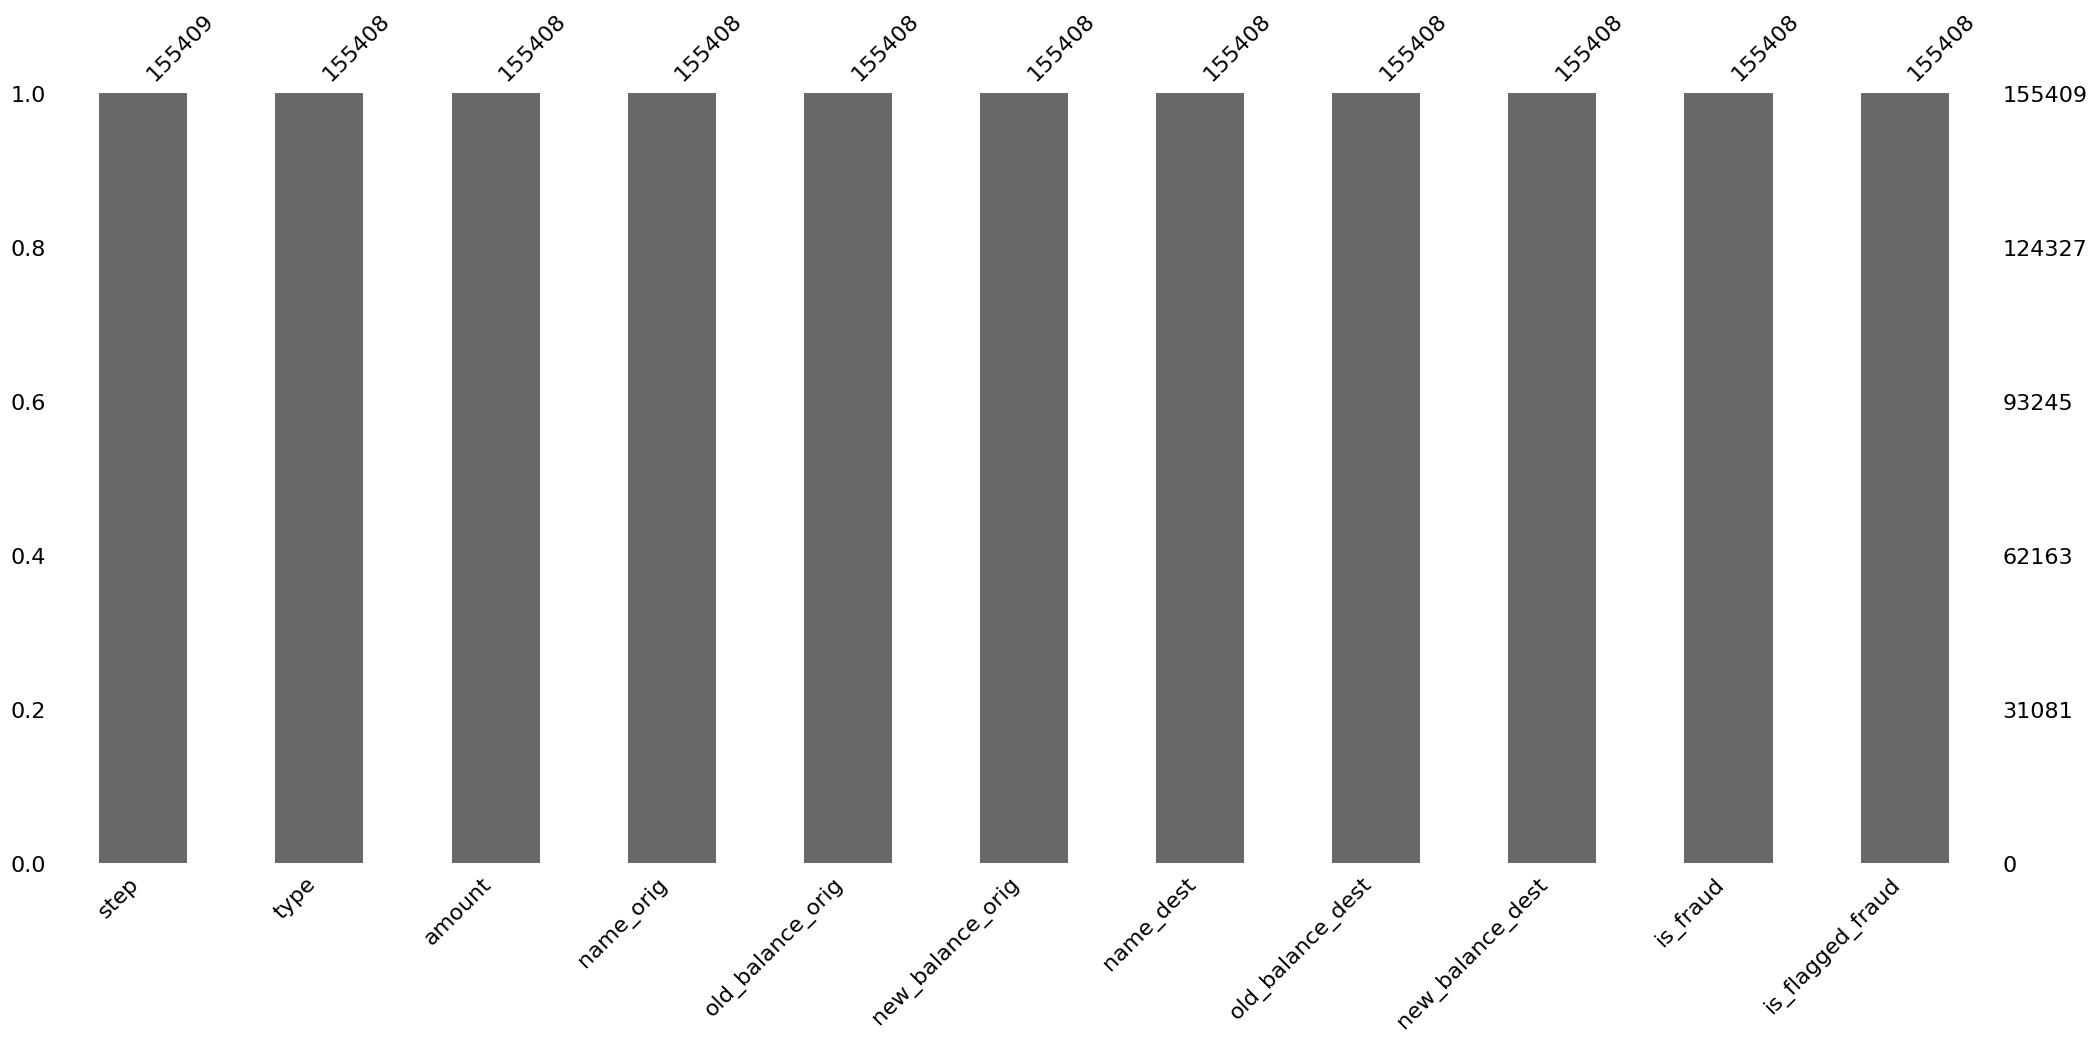

In [ ]:
msn.bar(df)

Provides us with a bargraph of how many elements are present in each variable 0 been the lowest and 1 been the highest

<Axes: >

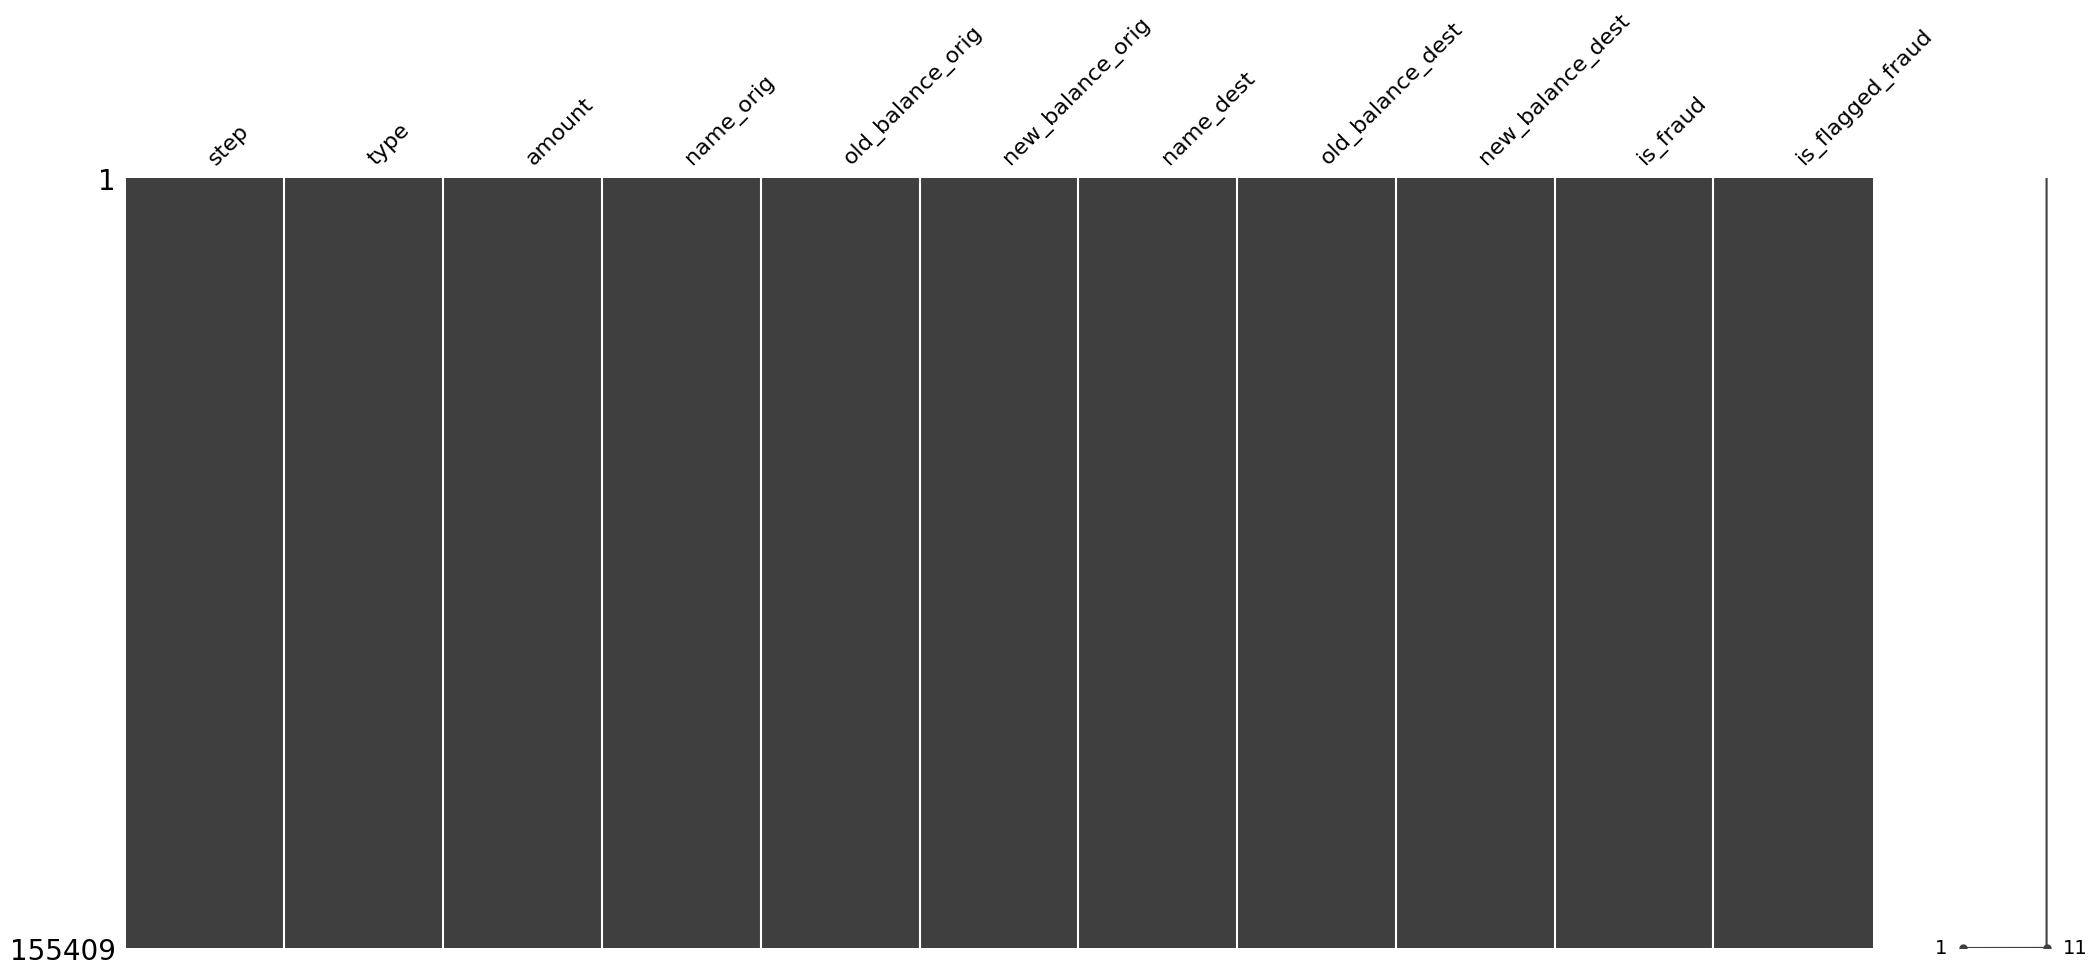

In [ ]:
msn.matrix(df)

**Dropping Missing values**

In [ ]:
a=df.dropna()
a

,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
155403,12,CASH_IN,300756.14,C1873700509,29379.0,330135.14,C770841586,260803.96,0.00,0.0,0.0
155404,12,TRANSFER,3064182.39,C1654306879,10053.0,0.00,C420784425,0.00,3064182.39,0.0,0.0
155405,12,CASH_OUT,92693.76,C1518219457,0.0,0.00,C1484055055,501466.00,594159.76,0.0,0.0
155406,12,CASH_OUT,415869.06,C1390731628,0.0,0.00,C1816201398,1205025.26,1620894.32,0.0,0.0


In [ ]:
a.shape

(158805, 11)

In [ ]:
a.isna().sum() #after dropping missing values

step                0
type                0
amount              0
name_orig           0
old_balance_orig    0
new_balance_orig    0
name_dest           0
old_balance_dest    0
new_balance_dest    0
is_fraud            0
is_flagged_fraud    0
dtype: int64

In [ ]:
a[['type']].value_counts()

type    
PAYMENT     60115
CASH_OUT    51362
CASH_IN     32578
TRANSFER    13312
DEBIT        1438
Name: count, dtype: int64

In [ ]:
a[['type']].value_counts(normalize=True)

type    
CASH_OUT    0.363426
PAYMENT     0.329136
CASH_IN     0.218605
TRANSFER    0.082389
DEBIT       0.006444
Name: proportion, dtype: float64

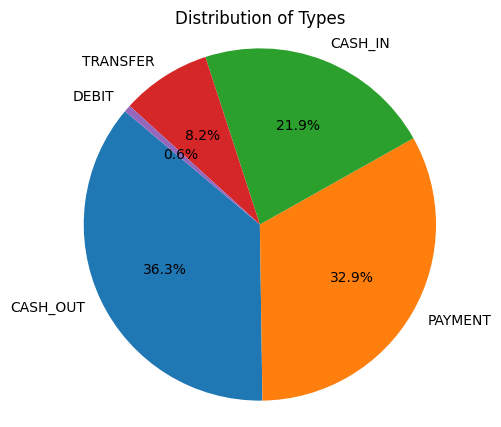

In [ ]:
import matplotlib.pyplot as plt

value_counts = a['type'].value_counts(normalize=True)

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.axis('equal')
plt.show()


It shows us a pie chat of all types

**Distribution of the dataset**

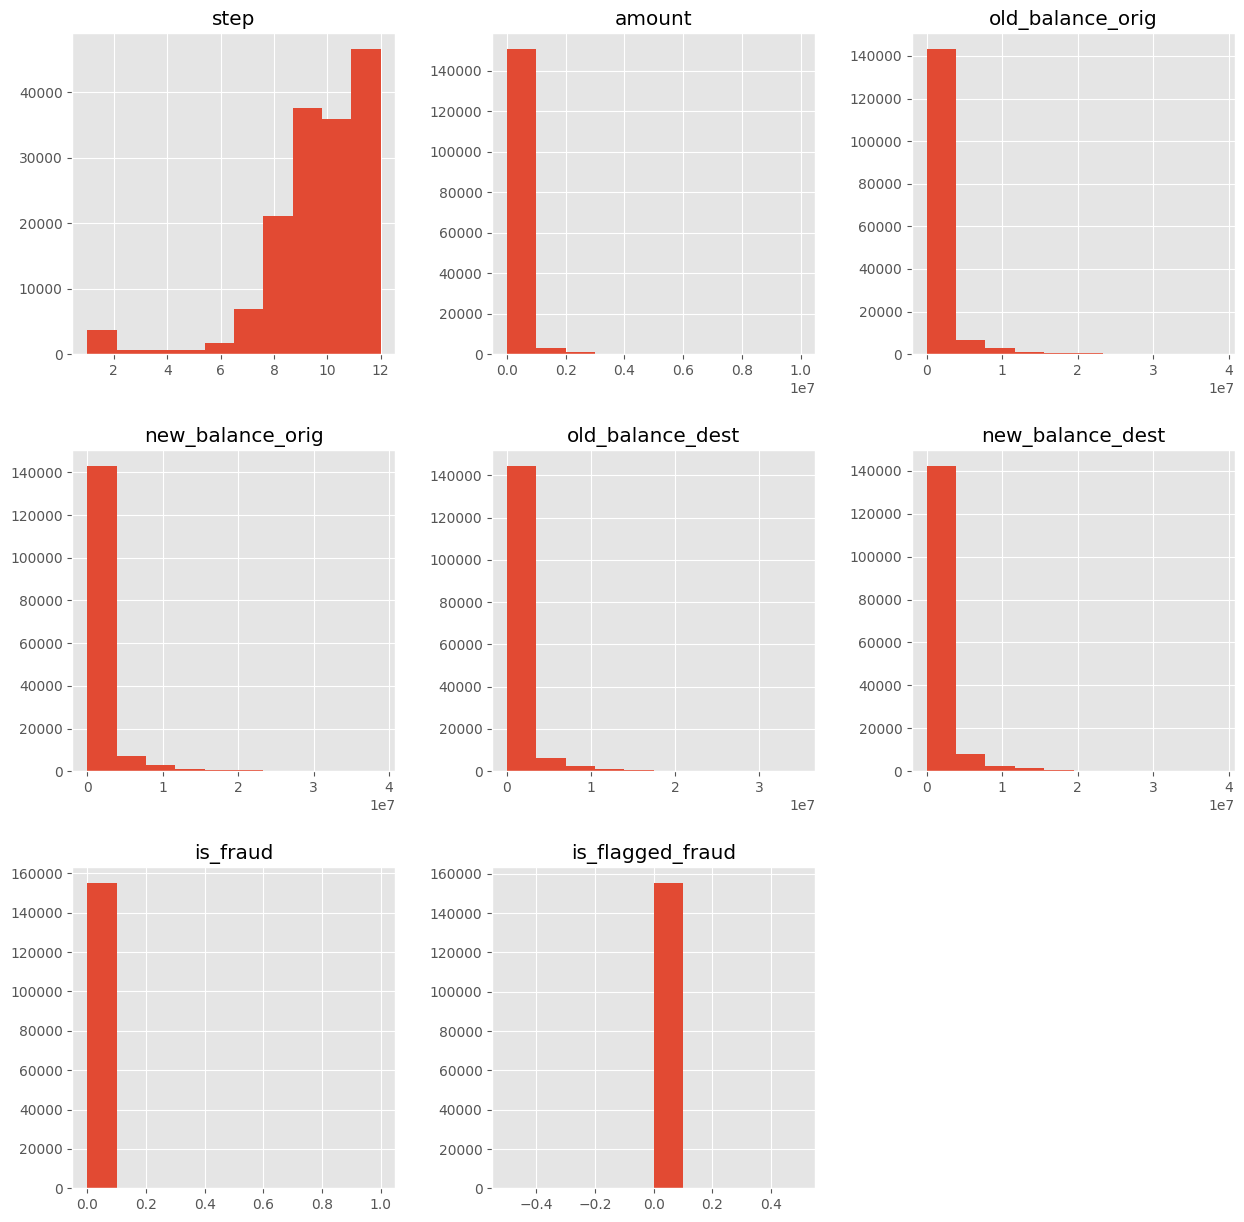

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt

plt.style.use('ggplot')  #
pd.DataFrame.hist(a, figsize = [15,15]);
plt.show()

It shows us a histogram of each column variable with specified sizes

It shows us a heatmap of the correlation matrix between variables and types

Text(0.5, 1.0, 'scatter plot of old and new balance destination')

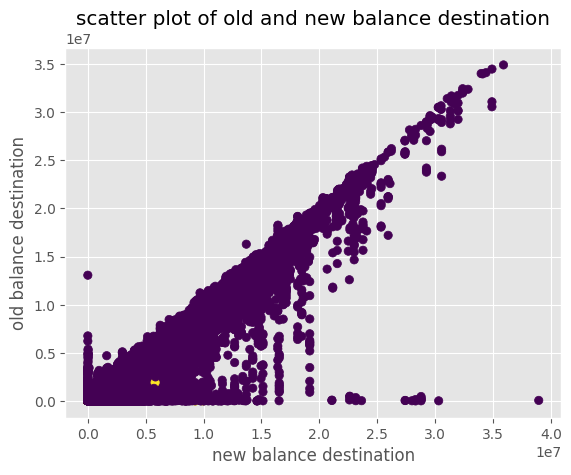

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['new_balance_dest'], df['old_balance_dest'], c=df['is_fraud'])
plt.xlabel('new balance destination')
plt.ylabel('old balance destination')
plt.title('scatter plot of old and new balance destination')

Shows us a scatterplot comparison of old and new balance destination

Text(0.5, 1.0, 'scatter plot of old and new balance destination')

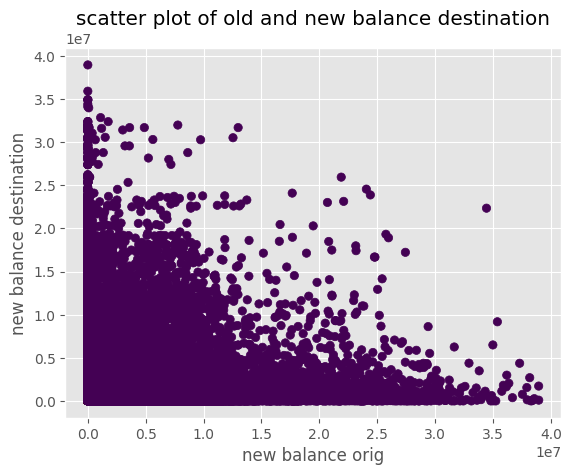

In [ ]:
plt.scatter(df['new_balance_orig'], df['new_balance_dest'], c=df['is_fraud'])
plt.xlabel('new balance orig')
plt.ylabel('new balance destination')
plt.title('scatter plot of old and new balance destination')

Shows us a scatterplot comparison between new balance origin and new balance destination

Text(0.5, 1.0, 'scatter plot of old balance orig and destination')

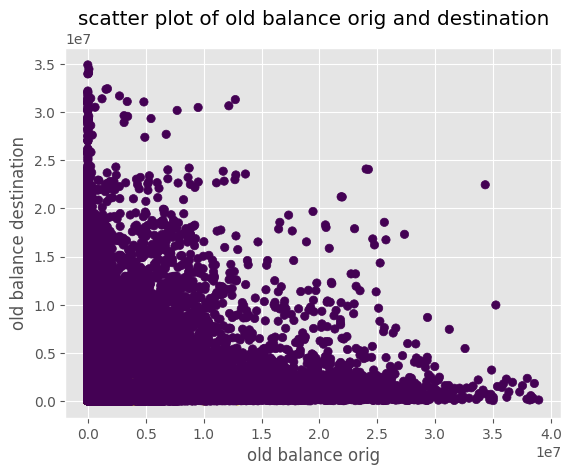

In [ ]:
plt.scatter(df['old_balance_orig'], df['old_balance_dest'], c=df['is_fraud'])
plt.xlabel('old balance orig')
plt.ylabel('old balance destination')
plt.title('scatter plot of old balance orig and destination')

Shows us a scatterplot comparison of old balance origin and old balance destination

Text(0.5, 1.0, 'scatter plot of old balance dest and new balance orig')

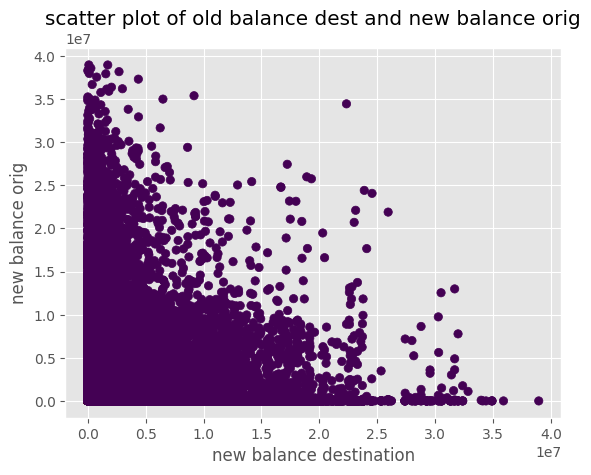

In [ ]:
plt.scatter(df['new_balance_dest'], df['new_balance_orig'],c=df['is_fraud'])
plt.xlabel('new balance destination')
plt.ylabel('new balance orig')
plt.title('scatter plot of old balance dest and new balance orig')

It is a scatter plot comparison of old balance destination and new balance origin

Histogram of step

(array([58952.,     0., 13079.,     0.,     0., 50160.,     0.,  1401.,
            0., 31816.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

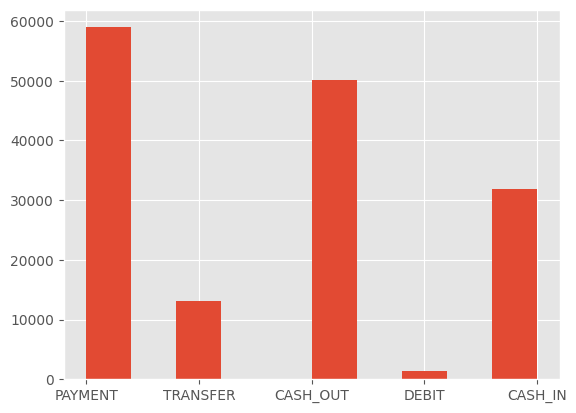

In [ ]:
plt.hist(a[['type']])

Histogram of types

In [ ]:
a.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
155403    False
155404    False
155405    False
155406    False
155407    False
Length: 155408, dtype: bool

In [ ]:
a.duplicated().sum()

0

In [ ]:
cleaned = a.drop(columns=['is_flagged_fraud'])

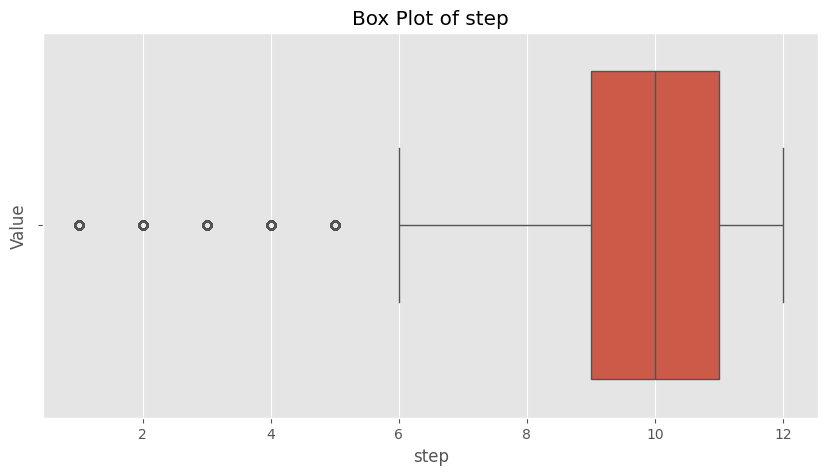

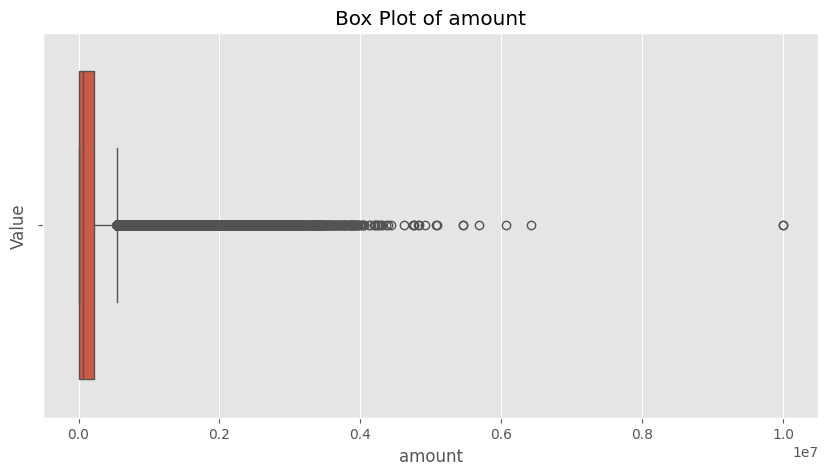

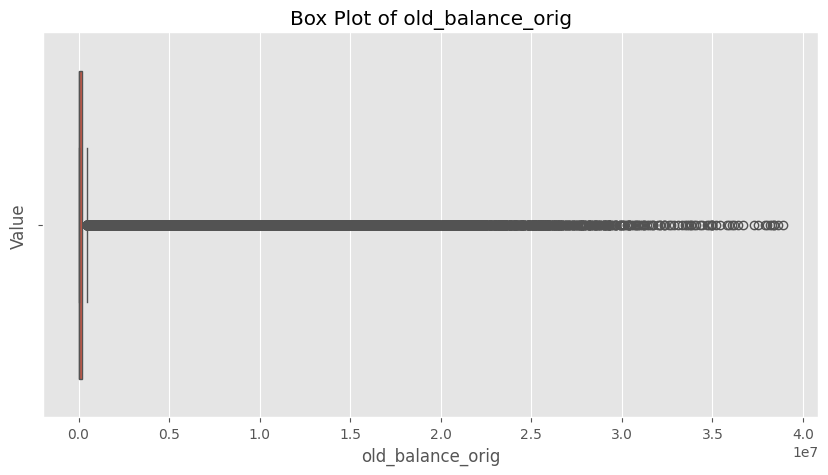

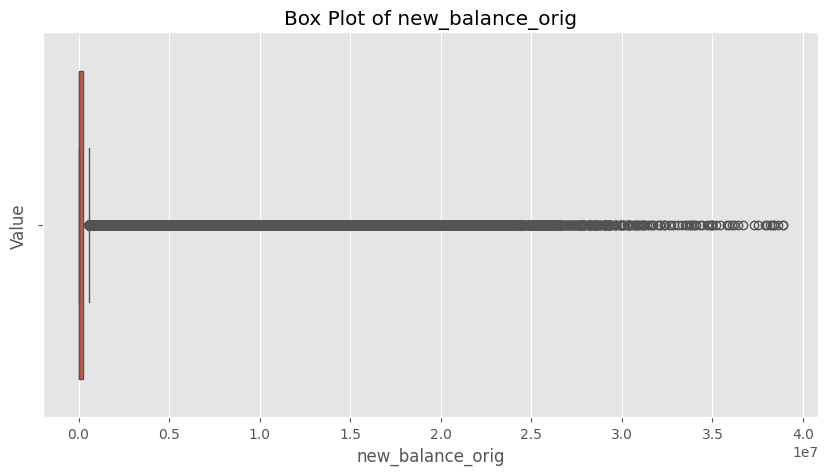

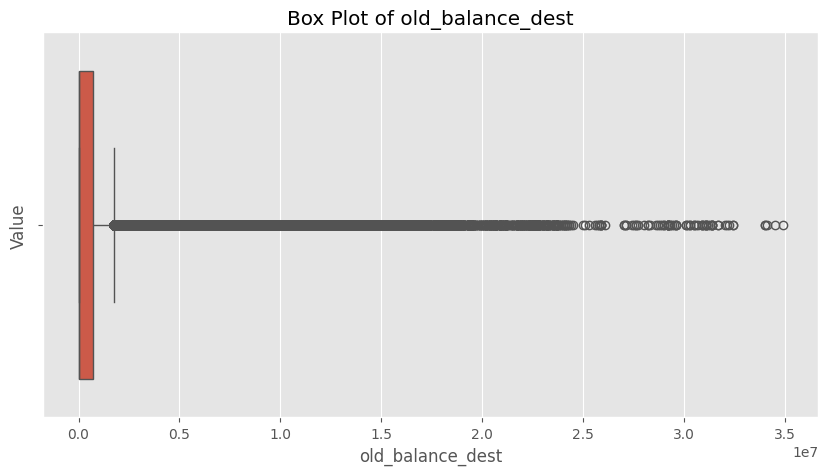

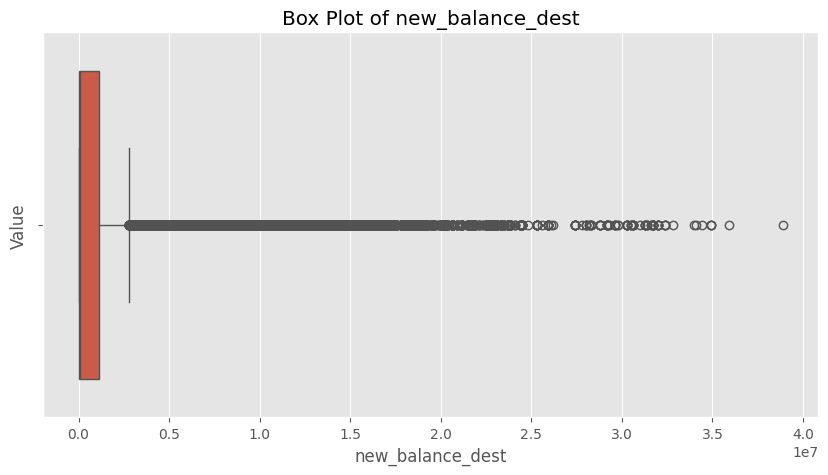

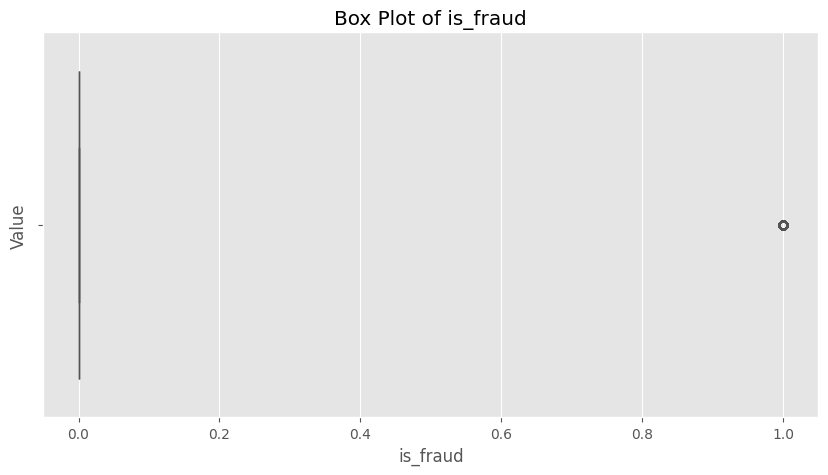

In [ ]:
import seaborn as sns

# For the box plots, we will again skip non-numeric data.
# We will use seaborn for better aesthetics.
for column in cleaned.columns:
    # Skip non-numeric data
    if cleaned[column].dtype == 'object':
        continue

    # Create a box plot for the column
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=cleaned, x=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()


Shows us the skewness of each variable

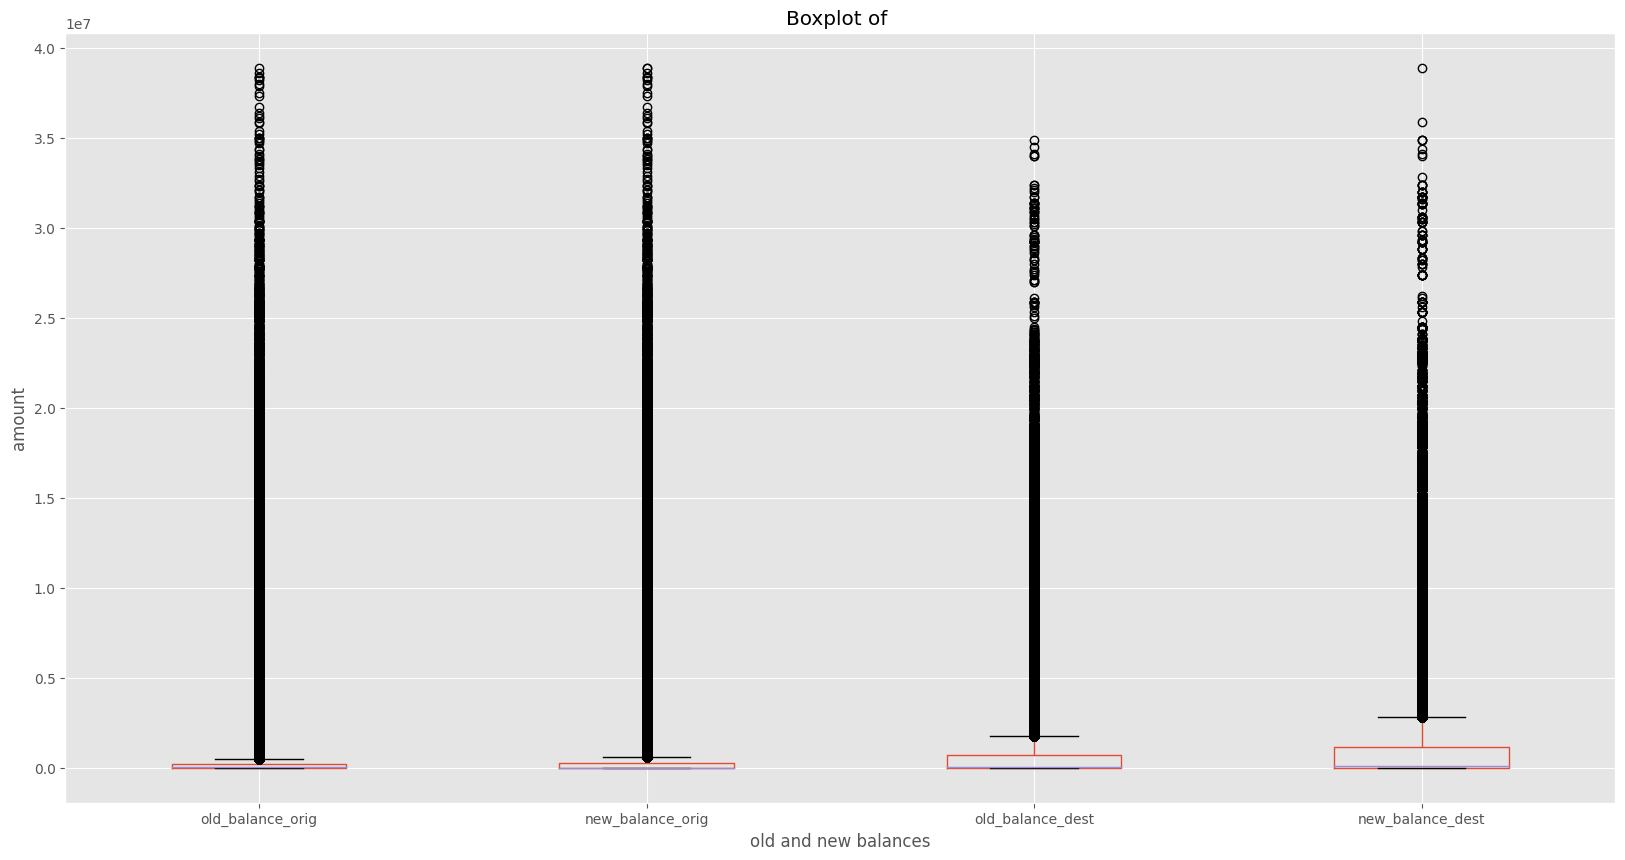

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 10))
cleaned.boxplot(column=['old_balance_orig', 'new_balance_orig', 'old_balance_dest','new_balance_dest'])
plt.title('Boxplot of ')
plt.xlabel('old and new balances')
plt.ylabel('amount')
plt.show()
plt.subplots_adjust(wspace=1.5)


It shows the distribution of each variable column

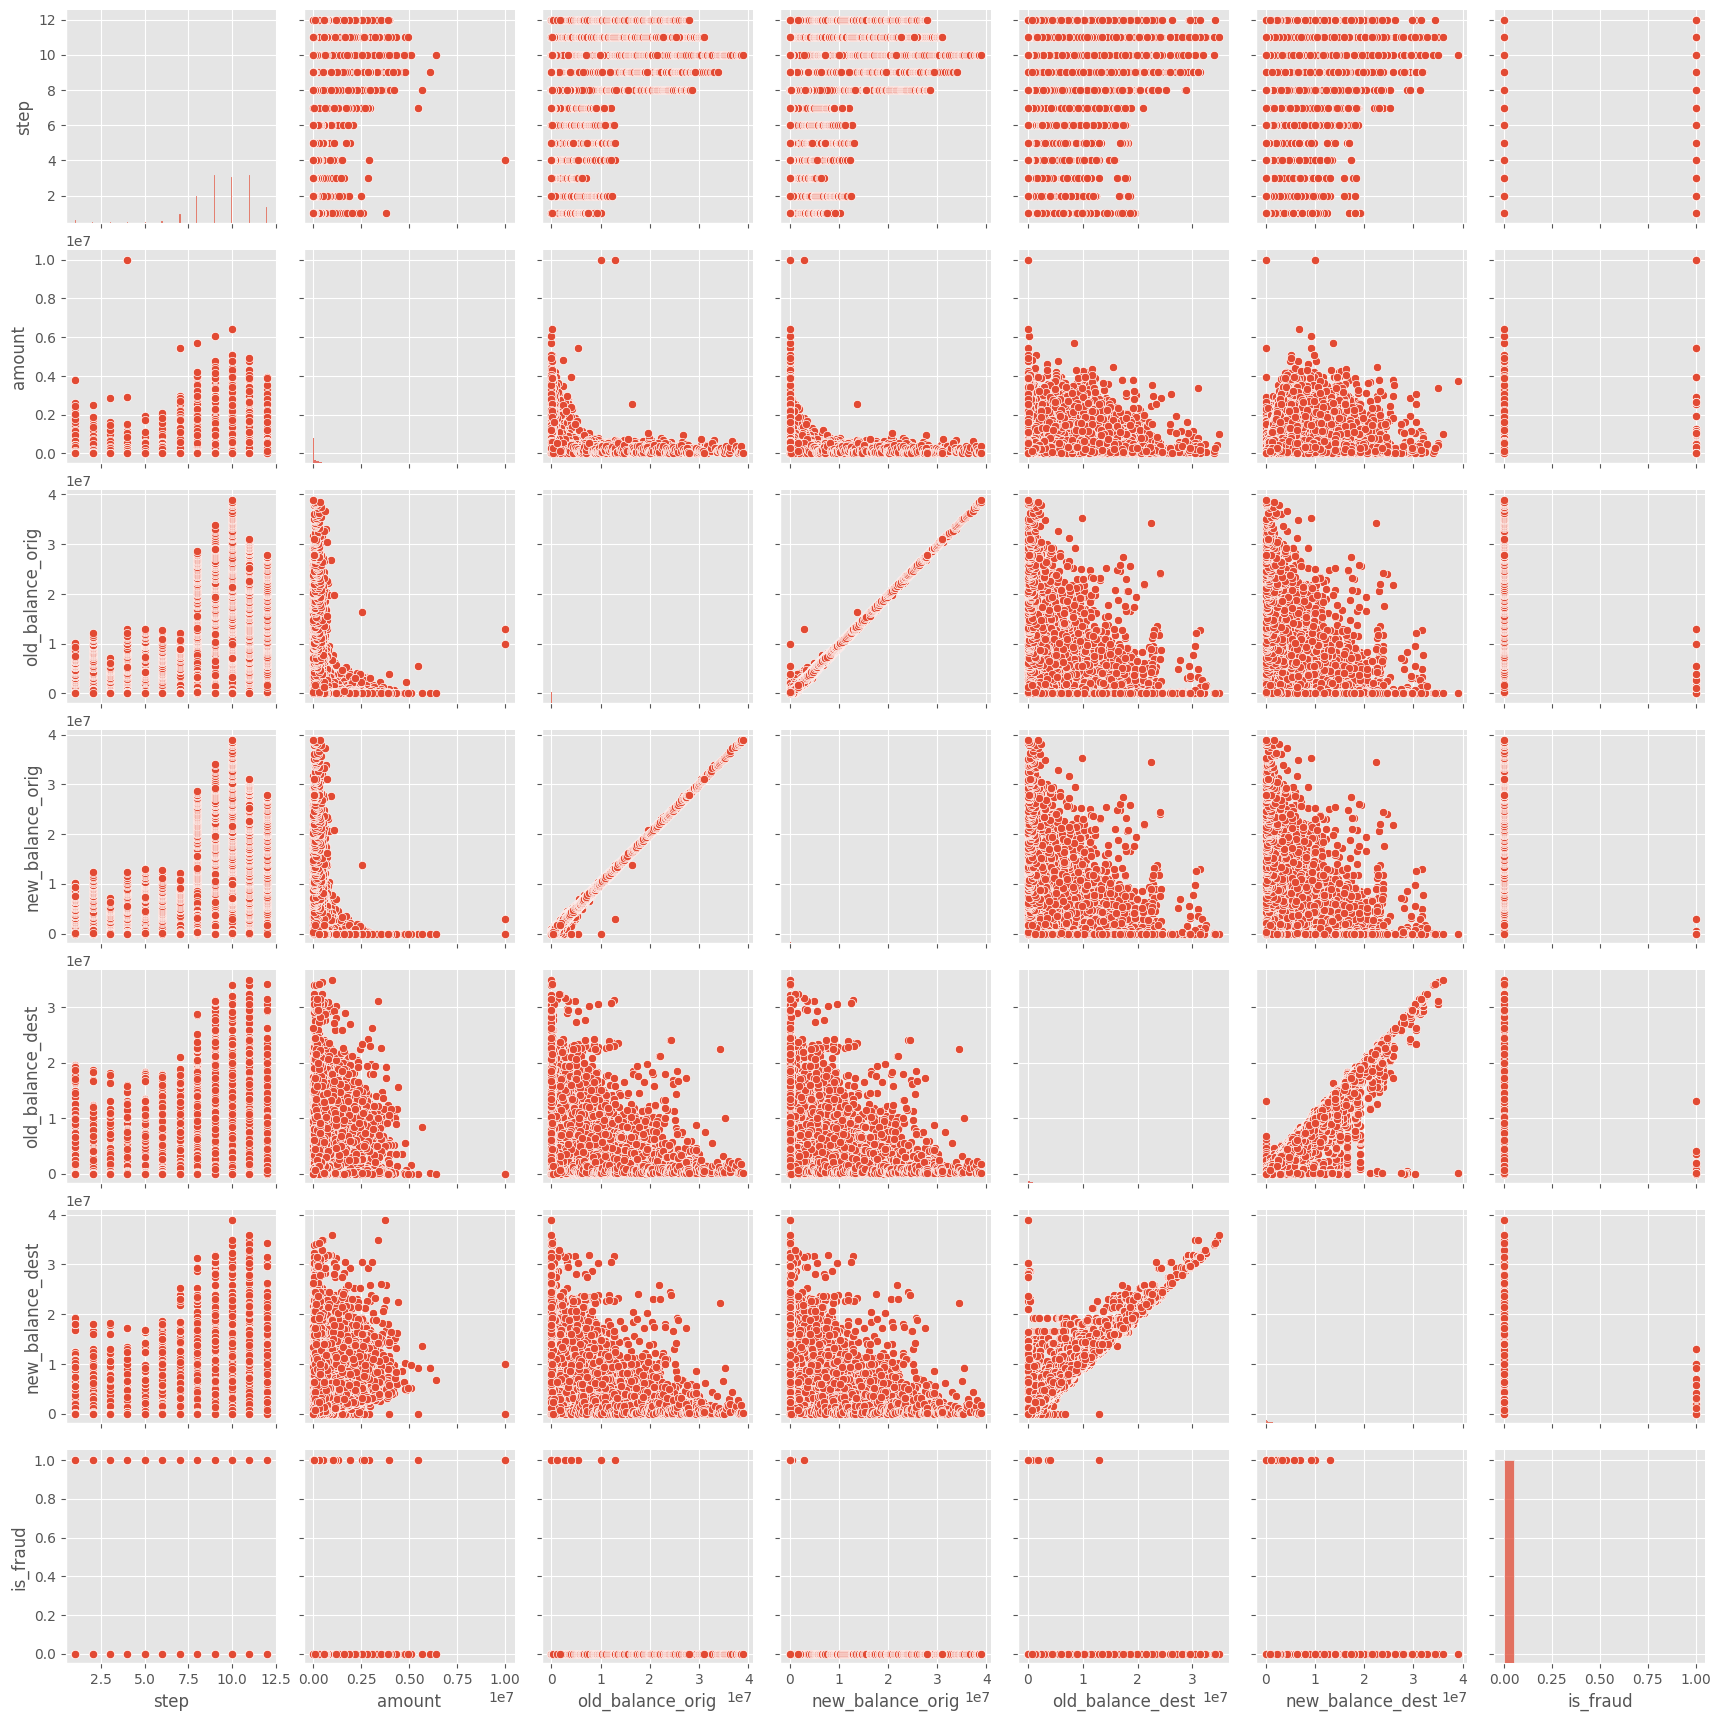

In [ ]:
pairs=sns.pairplot(cleaned)
pairs

This is a pair plot of all variables in comparison

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame

# One-hot encode the 'type' column
type_dummies = pd.get_dummies(cleaned['type'], prefix='type')

# Concatenate these new columns to the original DataFrame
cleaned = pd.concat([cleaned, type_dummies], axis=1)

# Optionally, you can drop the original 'type' column if it's no longer needed
# df.drop('type', axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
print(cleaned.head())

   step      type    amount    name_orig  old_balance_orig  new_balance_orig  \
0     1   PAYMENT   9839.64  C1231006815          170136.0         160296.36   
1     1   PAYMENT   1864.28  C1666544295           21249.0          19384.72   
2     1  TRANSFER    181.00  C1305486145             181.0              0.00   
3     1  CASH_OUT    181.00   C840083671             181.0              0.00   
4     1   PAYMENT  11668.14  C2048537720           41554.0          29885.86   

     name_dest  old_balance_dest  new_balance_dest  is_fraud  type_CASH_IN  \
0  M1979787155               0.0               0.0       0.0         False   
1  M2044282225               0.0               0.0       0.0         False   
2   C553264065               0.0               0.0       1.0         False   
3    C38997010           21182.0               0.0       1.0         False   
4  M1230701703               0.0               0.0       0.0         False   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_T

In [ ]:
cleaned.interpolate()


,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,False,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158800,12,PAYMENT,8419.19,C229879486,65663.00,57243.81,M144970293,0.00,0.00,0.0,False,False,False,True,False
158801,12,PAYMENT,8226.64,C406421341,249478.03,241251.39,M2010266027,0.00,0.00,0.0,False,False,False,True,False
158802,12,CASH_OUT,300328.35,C1736748977,241251.39,0.00,C708232604,1313688.45,2361567.14,0.0,False,True,False,False,False
158803,12,CASH_IN,551362.67,C1335442638,1203329.30,1754691.97,C1849840526,141187.62,6309495.47,0.0,True,False,False,False,False


In [ ]:
data = cleaned.drop(['type', 'name_orig', 'name_dest'], axis = 1)
data

,step,amount,old_balance_orig,new_balance_orig,old_balance_dest,new_balance_dest,is_fraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.00,0.00,0.0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.00,0.00,0.0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.00,0.00,1.0,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.00,0.00,1.0,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.00,0.00,0.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
155403,12,300756.14,29379.0,330135.14,260803.96,0.00,0.0,True,False,False,False,False
155404,12,3064182.39,10053.0,0.00,0.00,3064182.39,0.0,False,False,False,False,True
155405,12,92693.76,0.0,0.00,501466.00,594159.76,0.0,False,True,False,False,False
155406,12,415869.06,0.0,0.00,1205025.26,1620894.32,0.0,False,True,False,False,False


In [ ]:
Corr_Matrix = round(data.corr(),2)
print(Corr_Matrix)

                  step  amount  old_balance_orig  new_balance_orig  \
step              1.00    0.06             -0.00             -0.00   
amount            0.06    1.00             -0.02             -0.02   
old_balance_orig -0.00   -0.02              1.00              1.00   
new_balance_orig -0.00   -0.02              1.00              1.00   
old_balance_dest  0.02    0.23              0.10              0.10   
new_balance_dest  0.01    0.35              0.07              0.07   
is_fraud         -0.04    0.04             -0.00             -0.01   
type_CASH_IN      0.02   -0.00              0.54              0.56   
type_CASH_OUT     0.11    0.05             -0.20             -0.21   
type_DEBIT       -0.07   -0.05             -0.03             -0.03   
type_PAYMENT     -0.09   -0.39             -0.20             -0.21   
type_TRANSFER    -0.01    0.62             -0.09             -0.09   

                  old_balance_dest  new_balance_dest  is_fraud  type_CASH_IN  \
step     

we have drop the variables type, name_orig and name_dest from the dataset as they are not relevant with target variable

**Training, Testing and Model Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


# Define features (X) and target (y)
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
y_train.value_counts()

(124326, 11) (124326,)


is_fraud
0.0    124208
1.0       118
Name: count, dtype: int64

**training and testing the dataset on training set before smote**

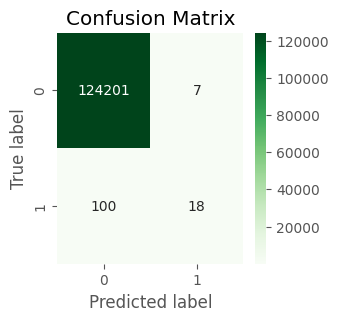

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    124208
         1.0       0.72      0.15      0.25       118

    accuracy                           1.00    124326
   macro avg       0.86      0.58      0.63    124326
weighted avg       1.00      1.00      1.00    124326

ROC AUC Score: 0.9203795246682983


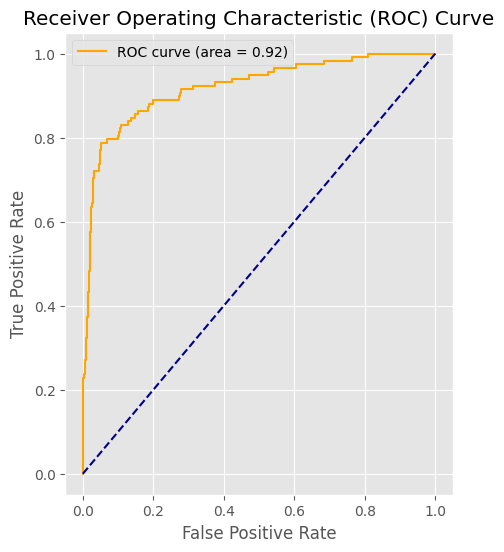

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_train)

# Calculate probabilities for ROC AUC score
y_pred_proba = log_reg.predict_proba(X_train)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_train, y_pred)
# Create a Confusion Matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Classification Report:\n", classification_report(y_train, y_pred))
print("ROC AUC Score:", roc_auc_score(y_train, y_pred_proba))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

For class 0.0: The model predicts all instances correctly, achieving perfect precision, recall, and F1-score.
For class 1.0: The model's precision is 72%, recall is 15%, and F1-score is 25%, indicating it struggles to identify instances of this class.
Overall accuracy is 100%, but the model's performance is unbalanced due to the imbalanced dataset.
The macro average precision is 86%, recall is 58%, and F1-score is 63%, indicating variability in performance across classes.
Weighted average precision, recall, and F1-score are all 100%, suggesting excellent overall performance, though this is skewed by the majority class.

**training and testing on testing dataset before smote****

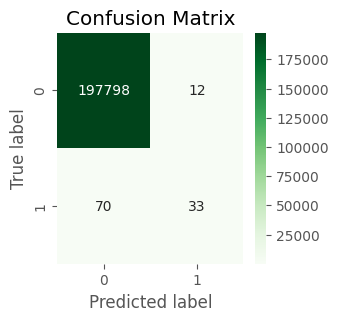

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    197810
         1.0       0.73      0.32      0.45       103

    accuracy                           1.00    197913
   macro avg       0.87      0.66      0.72    197913
weighted avg       1.00      1.00      1.00    197913

ROC AUC Score: 0.885986454590386


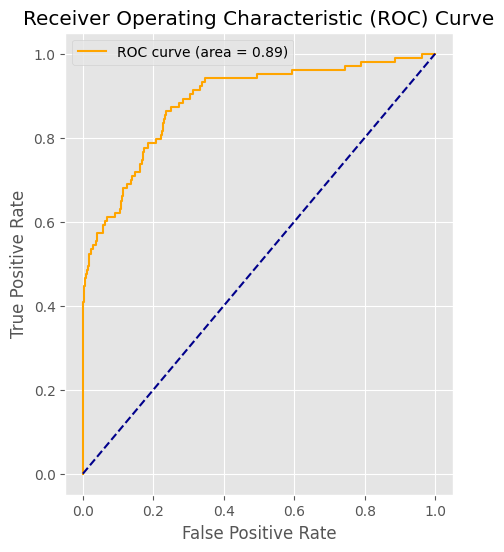

In [ ]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
# Create a Confusion Matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Precision (for class 1.0): The model correctly predicts 73% of the instances it identifies as class 1.0.
Recall (for class 1.0): The model captures 32% of all actual instances of class 1.0.
F1-score (for class 1.0): The harmonic mean of precision and recall for class 1.0 is 0.45.
Support (for class 1.0): There are 103 instances of class 1.0 in the dataset.
Accuracy: The model's overall accuracy is 100%, indicating it correctly classified almost all instances in the dataset.
Macro average precision, recall, and F1-score: The averages across all classes are 87% for precision, 66% for recall, and 72% for F1-score, showing relatively good performance, with recall being lower than precision.
Weighted average precision, recall, and F1-score: All are 100%, suggesting excellent overall performance, but this may be skewed by the majority class.
ROC AUC Score: The area under the ROC curve (AUC) is 0.89, indicating good overall performance of the model in distinguishing between the positive and negative classes.

Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Assuming 'df' is your DataFrame

# Define features (X) and target (y)
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)
print(X_train_smote.shape, y_train_smote.shape)
print(X_test.shape,y_test.shape)
y_train_smote.value_counts()

(791650, 11) (791650,)
(1582460, 11) (1582460,)
(197913, 11) (197913,)


is_fraud
0.0    791230
1.0    791230
Name: count, dtype: int64

**on training set after smote**

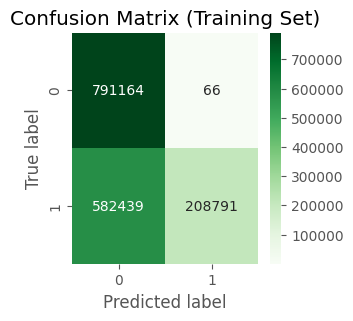

Classification Report (Training Set):
               precision    recall  f1-score   support

         0.0       0.58      1.00      0.73    791230
         1.0       1.00      0.26      0.42    791230

    accuracy                           0.63   1582460
   macro avg       0.79      0.63      0.57   1582460
weighted avg       0.79      0.63      0.57   1582460

ROC AUC Score (Training Set): 0.9055592154033778


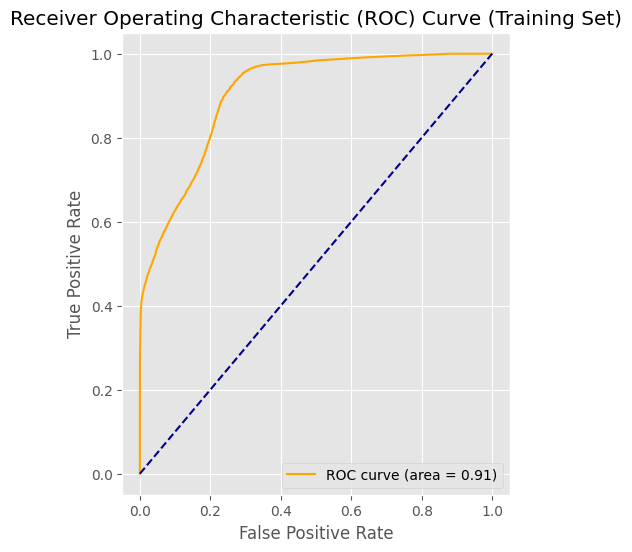

In [ ]:
# Predict on the training set
y_train_pred = log_reg.predict(X_train_smote)

# Calculate probabilities for ROC AUC score for the training set
y_train_pred_proba = log_reg.predict_proba(X_train_smote)[:, 1]

# Evaluate the model on the training set
cm_train = confusion_matrix(y_train_smote, y_train_pred)

# Create a Confusion Matrix for the training set
plt.figure(figsize=(3, 3))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Training Set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Classification Report (Training Set):\n", classification_report(y_train_smote, y_train_pred))
print("ROC AUC Score (Training Set):", roc_auc_score(y_train_smote, y_train_pred_proba))

# Calculate ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_smote, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Plotting ROC curve for the training set
plt.figure(figsize=(5, 6))
plt.plot(fpr_train, tpr_train, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend()
plt.show()


Precision (for class 0.0): The model correctly predicts 58% of the instances it identifies as class 0.0.
Recall (for class 0.0): The model captures all instances of class 0.0.
F1-score (for class 0.0): The harmonic mean of precision and recall for class 0.0 is 0.73.
Support (for class 0.0): There are 791,230 instances of class 0.0 in the training set.
Precision (for class 1.0): The model correctly predicts all instances it identifies as class 1.0.
Recall (for class 1.0): The model captures 26% of all actual instances of class 1.0.
F1-score (for class 1.0): The harmonic mean of precision and recall for class 1.0 is 0.42.
Support (for class 1.0): There are also 791,230 instances of class 1.0 in the training set.
Accuracy: The model's overall accuracy is 63%, which means it correctly classified 63% of the instances in the training set.
Macro average precision, recall, and F1-score: The averages across all classes are 79% for precision, 63% for recall, and 57% for F1-score, indicating some imbalance between the two classes, with class 0.0 having better performance.
Weighted average precision, recall, and F1-score: All are 79%, 63%, and 57%, respectively, showing the overall performance considering the class imbalance.
ROC AUC Score (Training Set): The area under the ROC curve (AUC) is 0.91, indicating very good performance of the model in distinguishing between the positive and negative classes on the training set.

**on test set after smote**

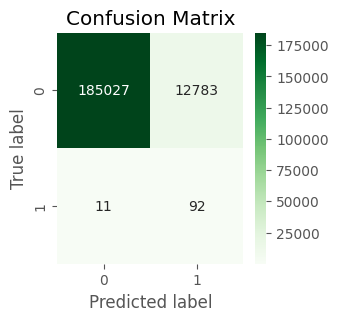

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    197810
         1.0       0.01      0.89      0.01       103

    accuracy                           0.94    197913
   macro avg       0.50      0.91      0.49    197913
weighted avg       1.00      0.94      0.97    197913

ROC AUC Score: 0.9333302575826662


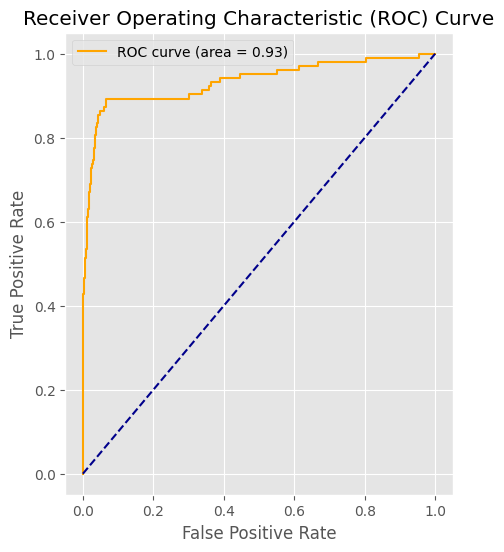

In [ ]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
# Create a Confusion Matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Precision (for class 0.0): The model correctly predicts 100% of the instances it identifies as class 0.0, but it wrongly identifies some instances as class 0.0.
Recall (for class 0.0): The model captures 94% of all actual instances of class 0.0.
F1-score (for class 0.0): The harmonic mean of precision and recall for class 0.0 is 0.97, indicating high accuracy in predicting class 0.0.
Support (for class 0.0): There are 197,810 instances of class 0.0 in the dataset.
Precision (for class 1.0): The model correctly identifies only 1% of the instances it predicts as class 1.0, indicating very low precision for class 1.0.
Recall (for class 1.0): However, the model captures 89% of all actual instances of class 1.0.
F1-score (for class 1.0): The harmonic mean of precision and recall for class 1.0 is extremely low at 0.01, indicating poor performance in predicting class 1.0.
Support (for class 1.0): There are 103 instances of class 1.0 in the dataset.
Accuracy: The model's overall accuracy is 94%, indicating it correctly classified 94% of the instances in the dataset. However, this is skewed by the abundance of class 0.0 instances.
Macro average precision, recall, and F1-score: The averages across all classes are 50% for precision, 91% for recall, and 49% for F1-score, showing significant imbalance and low performance for class 1.0.
Weighted average precision, recall, and F1-score: All are high, indicating overall good performance, but again, this is skewed by the abundance of class 0.0 instances.
ROC AUC Score: The area under the ROC curve (AUC) is 0.93, indicating good performance of the model in distinguishing between the positive and negative classes.

**KNN Algorithm**

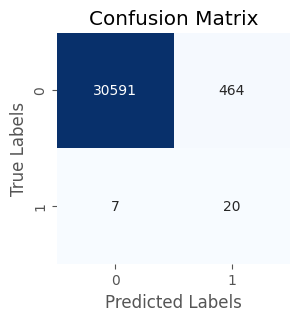

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     31055
         1.0       0.04      0.74      0.08        27

    accuracy                           0.98     31082
   macro avg       0.52      0.86      0.54     31082
weighted avg       1.00      0.98      0.99     31082

ROC AUC Score: 0.8641734795494254


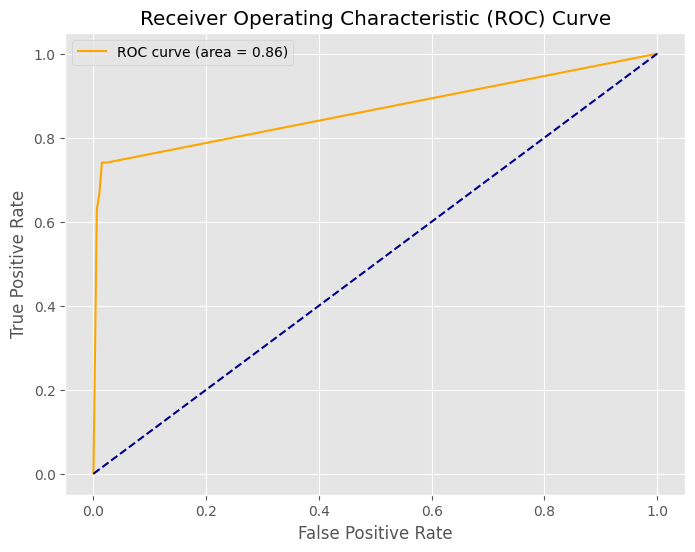

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'df' is your DataFrame

# Define features (X) and target (y)
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_proba = knn.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#print("Confusion Matrix:")
#print(conf_matrix)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Confusion Matrix:
True Negative (TN): 31,253
False Positive (FP): 481
False Negative (FN): 7
True Positive (TP): 20
Precision (for class 0.0): The model correctly predicts 100% of the instances it identifies as class 0.0, but it misclassifies some instances as class 0.0.
Recall (for class 0.0): The model captures 98% of all actual instances of class 0.0.
F1-score (for class 0.0): The harmonic mean of precision and recall for class 0.0 is 0.99, indicating high accuracy in predicting class 0.0.
Support (for class 0.0): There are 31,734 instances of class 0.0 in the dataset.
Precision (for class 1.0): The model correctly identifies only 4% of the instances it predicts as class 1.0, indicating very low precision for class 1.0.
Recall (for class 1.0): However, the model captures 74% of all actual instances of class 1.0.
F1-score (for class 1.0): The harmonic mean of precision and recall for class 1.0 is quite low at 0.08, indicating poor performance in predicting class 1.0.
Support (for class 1.0): There are 27 instances of class 1.0 in the dataset.
Accuracy: The model's overall accuracy is 98%, indicating it correctly classified 98% of the instances in the dataset. However, this is skewed by the abundance of class 0.0 instances.
Macro average precision, recall, and F1-score: The averages across all classes are 52% for precision, 86% for recall, and 53% for F1-score, showing significant imbalance and low performance for class 1.0.
Weighted average precision, recall, and F1-score: All are high, indicating overall good performance, but again, this is skewed by the abundance of class 0.0 instances.
ROC AUC Score: The area under the ROC curve (AUC) is 0.88, indicating good performance of the model in distinguishing between the positive and negative classes.

Minimum error:- 0.0007721510842288141 at K = 1


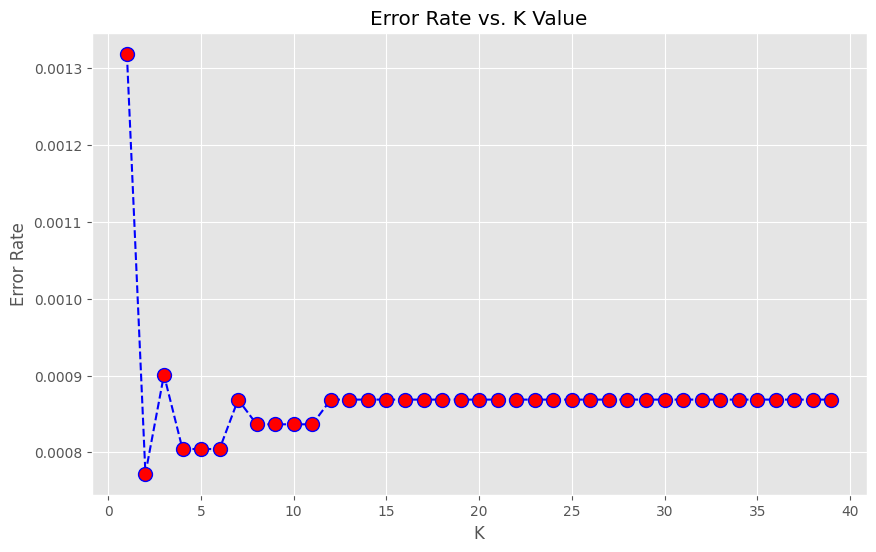

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Best K value: 20
ROC AUC Score (Best K): 0.9727045908183632


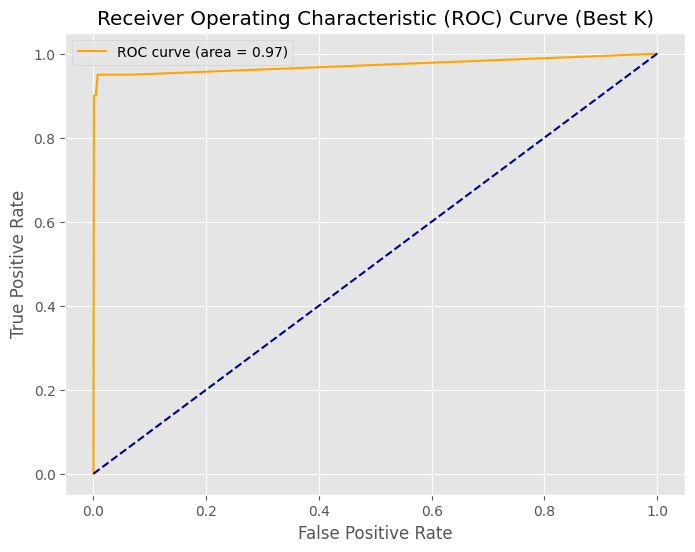

Classification Report (Best K):
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     31062
         1.0       0.02      0.95      0.04        20

    accuracy                           0.97     31082
   macro avg       0.51      0.96      0.51     31082
weighted avg       1.00      0.97      0.99     31082



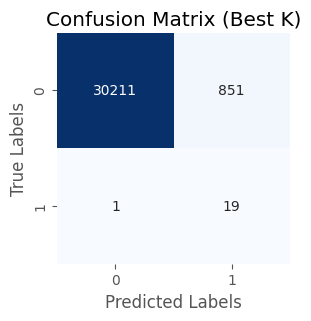

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of K values to try
param_grid = {'n_neighbors': range(1, 21)}  # Try K values from 1 to 20

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_smote, y_train_smote)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']
print("Best K value:", best_k)

# Train a KNN model with the best K value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_best_k = best_knn.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_proba_best_k = best_knn.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc_best_k = roc_auc_score(y_test, y_pred_proba_best_k)
print("ROC AUC Score (Best K):", roc_auc_best_k)

# Plot ROC curve
fpr_best_k, tpr_best_k, _ = roc_curve(y_test, y_pred_proba_best_k)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_k, tpr_best_k, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_best_k)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Best K)')
plt.legend()
plt.show()

# Classification Report for the best K
print("Classification Report (Best K):\n", classification_report(y_test, y_pred_best_k))

# Confusion Matrix for the best K
cm_best_k = confusion_matrix(y_test, y_pred_best_k)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_best_k, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Best K)')
plt.show()


**Decison Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


**By gini**

In [ ]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

0.9981661411749566

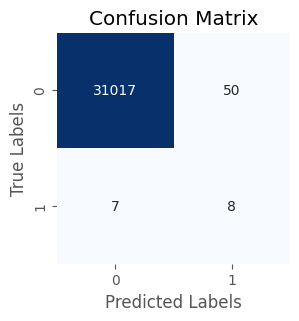

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31067
         1.0       0.14      0.53      0.22        15

    accuracy                           1.00     31082
   macro avg       0.57      0.77      0.61     31082
weighted avg       1.00      1.00      1.00     31082



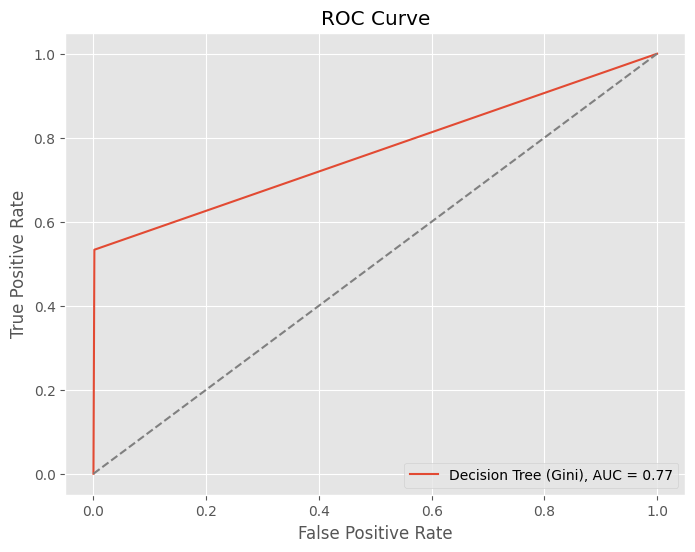

In [ ]:
cm = confusion_matrix(y_test, y_pred_gini)

# Visualize the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report_gini = classification_report(y_test, y_pred_gini)
print("Classification Report:")
print(class_report_gini)

# ROC curve and ROC AUC score
y_pred_proba_gini = dt_gini.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gini)
roc_auc = roc_auc_score(y_test, y_pred_proba_gini)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree (Gini), AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**by entropy**

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_entropy = dt_entropy.predict(X_test)


accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.9979731034038993

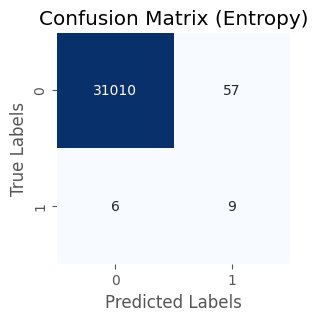

Classification Report (Entropy):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31067
         1.0       0.14      0.60      0.22        15

    accuracy                           1.00     31082
   macro avg       0.57      0.80      0.61     31082
weighted avg       1.00      1.00      1.00     31082



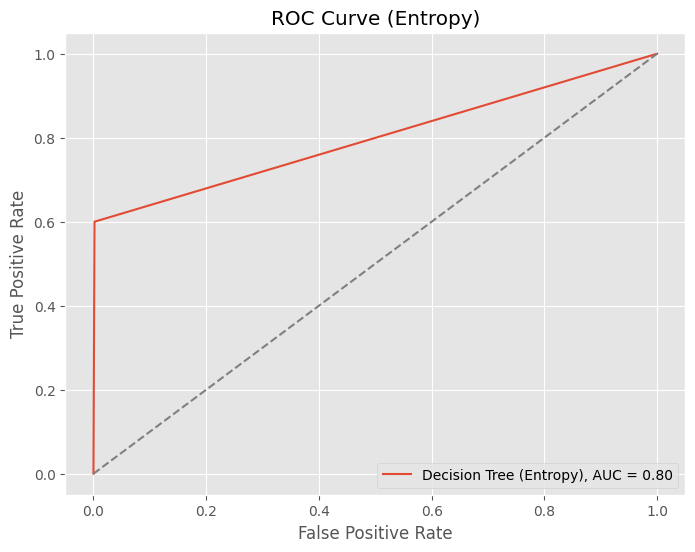

In [ ]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

# Visualize the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm_entropy, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Entropy)')
plt.show()

# Classification report
class_report_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report (Entropy):")
print(class_report_entropy)

# ROC curve and ROC AUC score
y_pred_proba_entropy = dt_entropy.predict_proba(X_test)[:, 1]
fpr_entropy, tpr_entropy, thresholds_entropy = roc_curve(y_test, y_pred_proba_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_proba_entropy)

plt.figure(figsize=(8, 6))
plt.plot(fpr_entropy, tpr_entropy, label='Decision Tree (Entropy), AUC = {:.2f}'.format(roc_auc_entropy))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Entropy)')
plt.legend(loc='lower right')
plt.show()

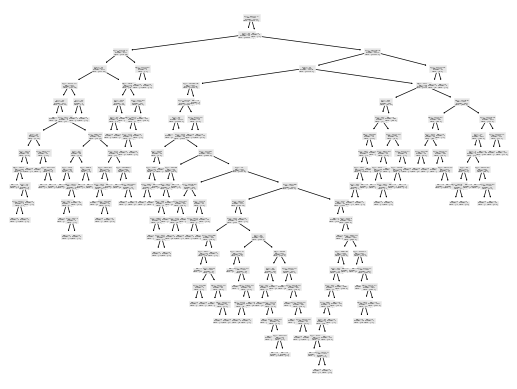

In [ ]:
from sklearn import tree
tree.plot_tree(dt_gini)
plt.show()

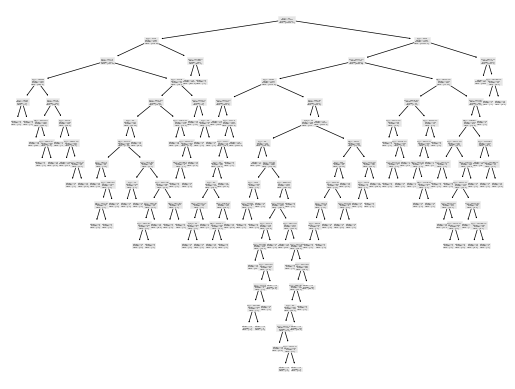

In [ ]:
tree.plot_tree(dt_entropy)
plt.show()

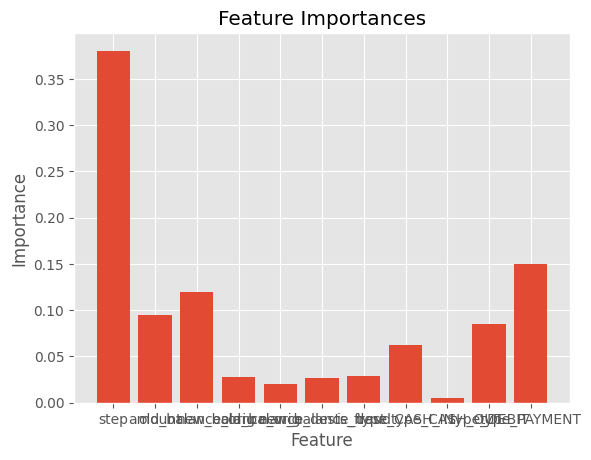

In [ ]:
import matplotlib.pyplot as plt

# Retrieve feature importances
importances = dt_gini.feature_importances_

# Visualize feature importances
plt.bar(range(len(importances)), importances, tick_label=data.columns[:-1])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

import sklearn.tree as tree

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [ ]:
regression_tree = DecisionTreeRegressor(criterion = 'squared_error')
regression_tree.fit(X_train, y_train)
predTree = regression_tree.predict(X_test)
predTree


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
regression_tree.score(X_test, y_test)

-0.0007562151432085606

In [ ]:
regression_tree.score(X_train, y_train)

1.0

In [ ]:
prediction = regression_tree.predict(X_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

[Text(0.6093546549479166, 0.9736842105263158, 'x[1] <= 5271437.25\nsquared_error = 0.001\nsamples = 127044\nvalue = 0.001'),
 Text(0.4696044921875, 0.9210526315789473, 'x[0] <= 6.5\nsquared_error = 0.001\nsamples = 127038\nvalue = 0.001'),
 Text(0.22135416666666666, 0.868421052631579, 'x[10] <= 0.5\nsquared_error = 0.009\nsamples = 5747\nvalue = 0.009'),
 Text(0.15104166666666666, 0.8157894736842105, 'x[1] <= 912557.156\nsquared_error = 0.005\nsamples = 5260\nvalue = 0.005'),
 Text(0.140625, 0.7631578947368421, 'x[7] <= 0.5\nsquared_error = 0.005\nsamples = 5257\nvalue = 0.005'),
 Text(0.13020833333333334, 0.7105263157894737, 'squared_error = 0.0\nsamples = 4543\nvalue = 0.0'),
 Text(0.15104166666666666, 0.7105263157894737, 'x[4] <= 11412.0\nsquared_error = 0.032\nsamples = 714\nvalue = 0.034'),
 Text(0.08854166666666667, 0.6578947368421053, 'x[0] <= 4.5\nsquared_error = 0.245\nsamples = 35\nvalue = 0.429'),
 Text(0.0625, 0.6052631578947368, 'x[2] <= 206604.828\nsquared_error = 0.198\n

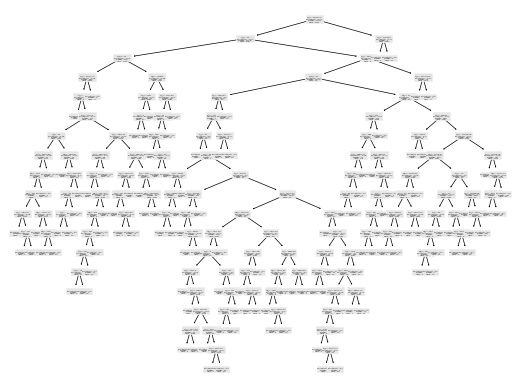

In [ ]:
tree.plot_tree(regression_tree)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Assuming y_true and y_pred are your true and predicted regression targets respectively
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Define a threshold to convert regression predictions into binary predictions
threshold = 2.5  # Example threshold

# Convert regression predictions into binary predictions based on the threshold
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_true >= threshold, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_true >= threshold, y_pred_binary)
print("F1 Score:", f1)


Accuracy: 1.0
F1 Score: 1.0


**Random forest**

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9992443562860112


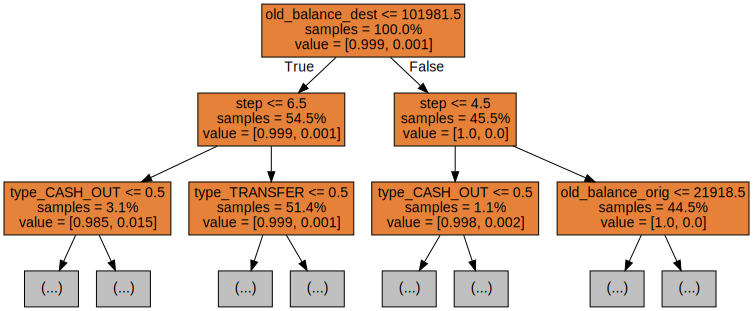

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ee42942a530>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ee4291c0040>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 308}


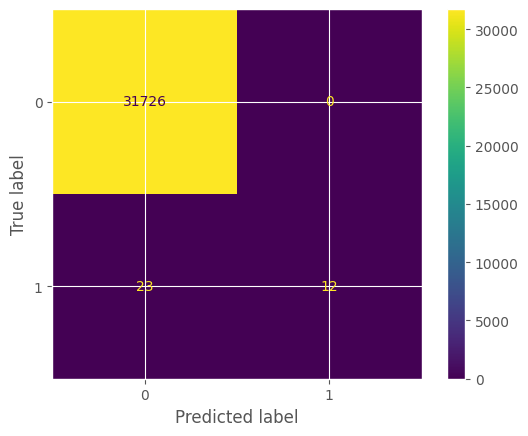

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();


In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9988980195837662
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

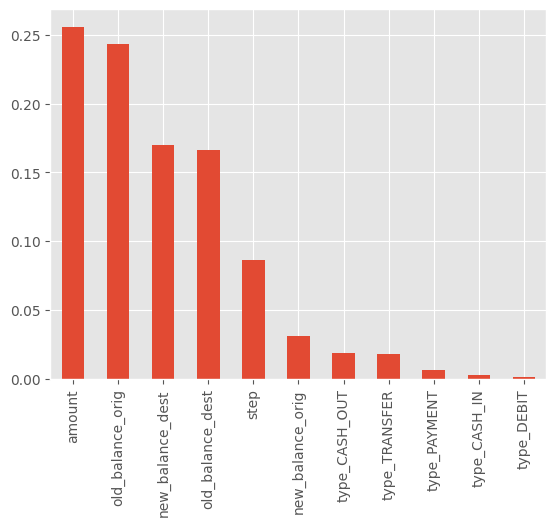

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns (excluding identifiers and target variables if not needed in scaling)
features_to_scale = ['amount', 'old_balance_orig', 'new_balance_orig', 'old_balance_dest', 'new_balance_dest']
scaler = StandardScaler()

# Fitting the scaler to the data
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [ ]:
data

,step,amount,old_balance_orig,new_balance_orig,old_balance_dest,new_balance_dest,is_fraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.501382,-0.257504,-0.263472,-0.386030,-0.438177,0.0,False,False,False,True,False
1,1,-0.525011,-0.309750,-0.312286,-0.386030,-0.438177,0.0,False,False,False,True,False
2,1,-0.529998,-0.317144,-0.319001,-0.386030,-0.438177,1.0,False,False,False,False,True
3,1,-0.529998,-0.317144,-0.319001,-0.377140,-0.438177,1.0,False,True,False,False,False
4,1,-0.495965,-0.302625,-0.308648,-0.386030,-0.438177,0.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
158800,12,-0.505591,-0.294165,-0.299171,-0.386030,-0.438177,0.0,False,False,False,True,False
158801,12,-0.506161,-0.229661,-0.235428,-0.386030,-0.438177,0.0,False,False,False,True,False
158802,12,0.359265,-0.232548,-0.319001,0.165307,0.438159,0.0,False,True,False,False,False
158803,12,1.103019,0.105060,0.288850,-0.326775,1.903167,0.0,True,False,False,False,False


**Logistic regression after standardization**

Confusion Matrix:
 [[27943  3112]
 [    0    27]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     31055
         1.0       0.01      1.00      0.02        27

    accuracy                           0.90     31082
   macro avg       0.50      0.95      0.48     31082
weighted avg       1.00      0.90      0.95     31082

ROC AUC Score: 0.9699958854362332


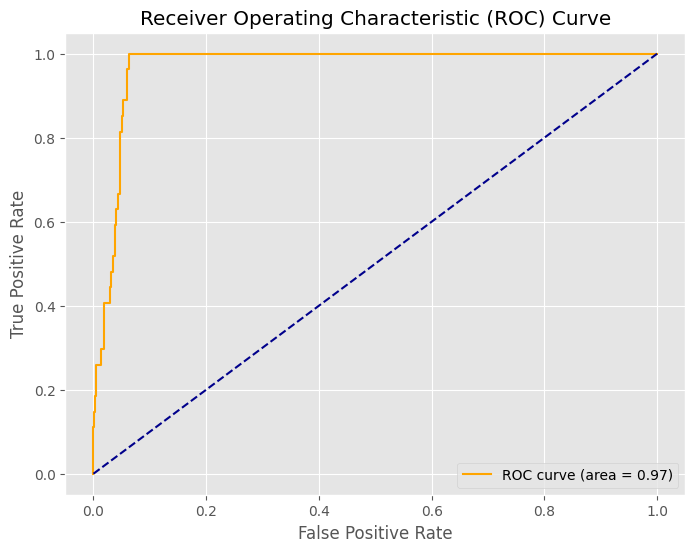

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Assuming 'df' is your DataFrame

# Define features (X) and target (y)
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**KNN after standardization**

Confusion Matrix:
 [[30591   464]
 [    7    20]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     31055
         1.0       0.04      0.74      0.08        27

    accuracy                           0.98     31082
   macro avg       0.52      0.86      0.54     31082
weighted avg       1.00      0.98      0.99     31082

ROC AUC Score: 0.8641734795494254


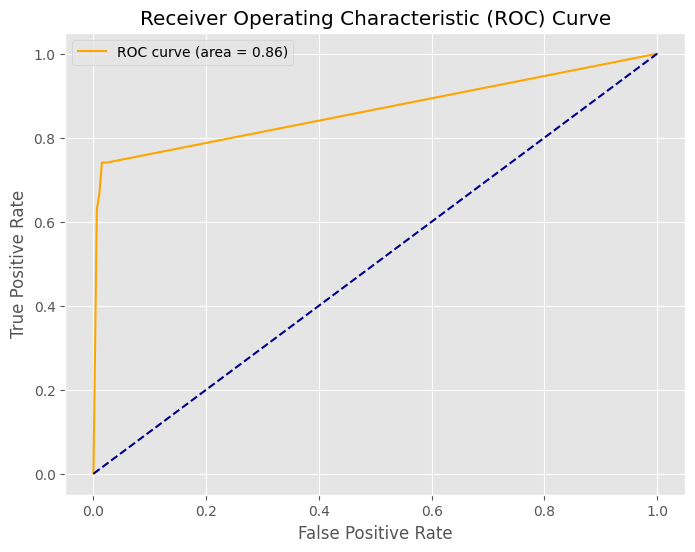

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Assuming 'df' is your DataFrame

# Define features (X) and target (y)
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Minimum error:- 0.0008186140234879254 at K = 3


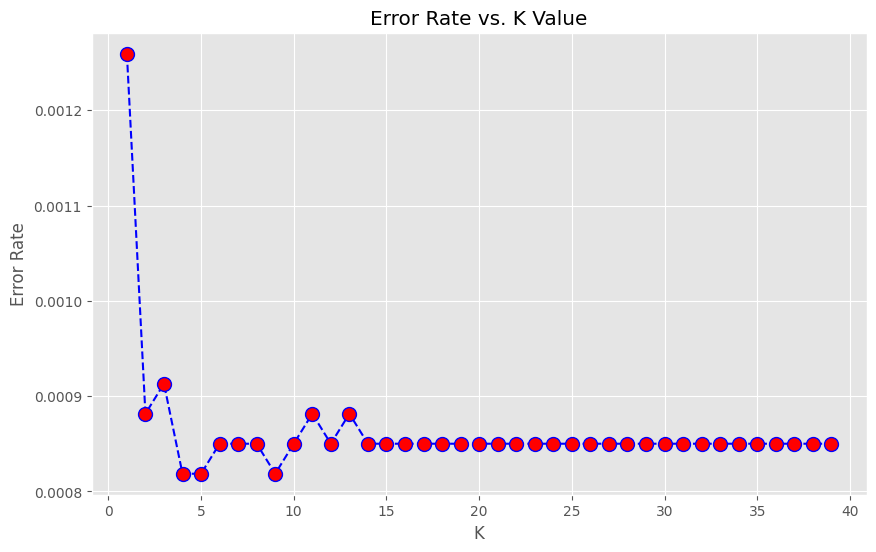

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

print(mean_acc)
print(std_acc)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Decision Tree after standardization**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.9990554453575139, 0.9992443562860112)

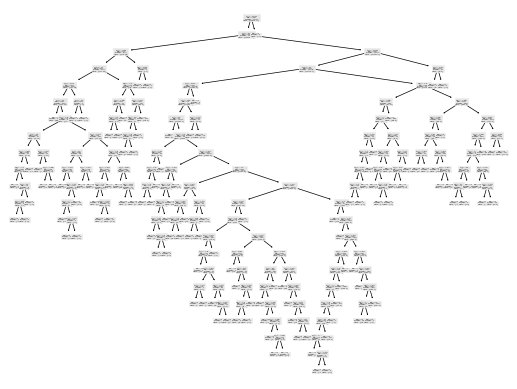

In [ ]:
from sklearn import tree
tree.plot_tree(dt_gini)
plt.show()

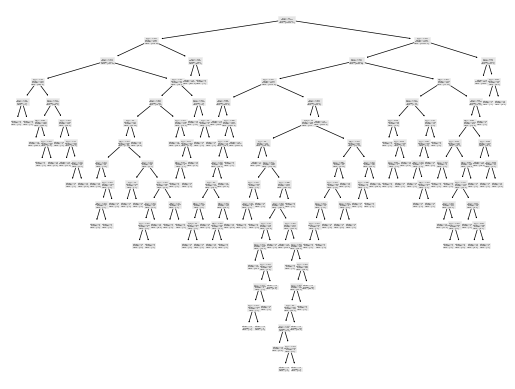

In [ ]:
tree.plot_tree(dt_entropy)
plt.show()

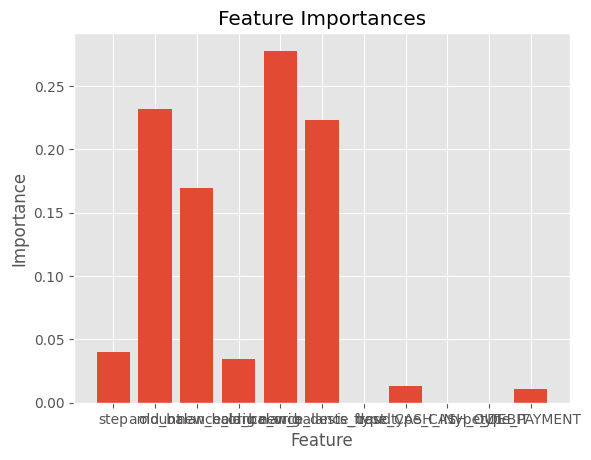

In [ ]:
import matplotlib.pyplot as plt

# Retrieve feature importances
importances = dt_gini.feature_importances_

# Visualize feature importances
plt.bar(range(len(importances)), importances, tick_label=data.columns[:-1])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Regression after standardization

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

import sklearn.tree as tree

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [ ]:
regression_tree = DecisionTreeRegressor(criterion = 'squared_error')
regression_tree.fit(X_train, y_train)
predTree = regression_tree.predict(X_test)
predTree


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
regression_tree.score(X_test, y_test)

0.332938987643835

In [ ]:
regression_tree.score(X_train, y_train)

1.0

In [ ]:
prediction = regression_tree.predict(X_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

[Text(0.8476829384857754, 0.9827586206896551, 'x[1] <= 4972300.25\nsquared_error = 0.001\nsamples = 791650\nvalue = 0.001'),
 Text(0.8087306568457645, 0.9482758620689655, 'x[1] <= 3473447.75\nsquared_error = 0.0\nsamples = 791621\nvalue = 0.0'),
 Text(0.7459204331883844, 0.9137931034482759, 'x[10] <= 0.5\nsquared_error = 0.0\nsamples = 791478\nvalue = 0.0'),
 Text(0.6353943254962657, 0.8793103448275862, 'x[1] <= 1252372.25\nsquared_error = 0.0\nsamples = 726308\nvalue = 0.0'),
 Text(0.5637107225334119, 0.8448275862068966, 'x[1] <= 1013369.906\nsquared_error = 0.0\nsamples = 726279\nvalue = 0.0'),
 Text(0.4404693027712264, 0.8103448275862069, 'x[1] <= 781932.969\nsquared_error = 0.0\nsamples = 726231\nvalue = 0.0'),
 Text(0.22417514249213835, 0.7758620689655172, 'x[0] <= 6.5\nsquared_error = 0.0\nsamples = 725823\nvalue = 0.0'),
 Text(0.04150943396226415, 0.7413793103448276, 'x[7] <= 0.5\nsquared_error = 0.004\nsamples = 5204\nvalue = 0.004'),
 Text(0.03647798742138365, 0.70689655172413

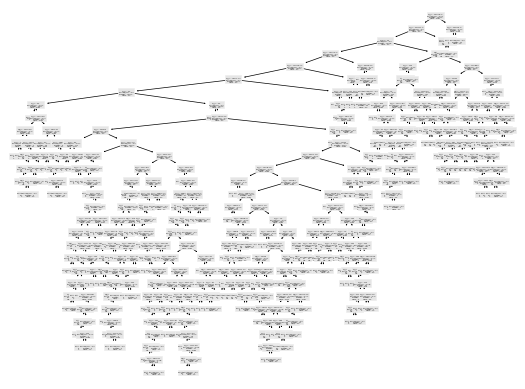

In [ ]:
tree.plot_tree(regression_tree)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Assuming y_true and y_pred are your true and predicted regression targets respectively
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Define a threshold to convert regression predictions into binary predictions
threshold = 2.5  # Example threshold

# Convert regression predictions into binary predictions based on the threshold
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_true >= threshold, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_true >= threshold, y_pred_binary)
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


**Random forest after standardization**

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

**Random forest on train set before smote**

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


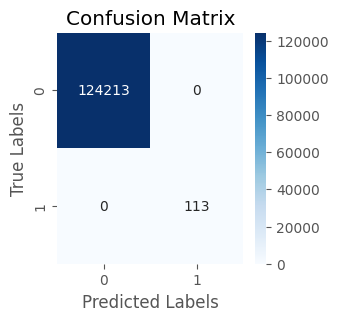

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print the classification report
report = classification_report(y_train, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    124213
         1.0       1.00      1.00      1.00       113

    accuracy                           1.00    124326
   macro avg       1.00      1.00      1.00    124326
weighted avg       1.00      1.00      1.00    124326



It is overfitting the data

**Random Forest on test set before smote**

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9996782703815713


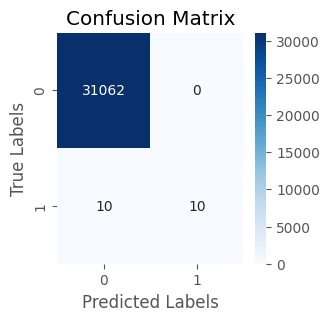

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31062
         1.0       1.00      0.50      0.67        20

    accuracy                           1.00     31082
   macro avg       1.00      0.75      0.83     31082
weighted avg       1.00      1.00      1.00     31082



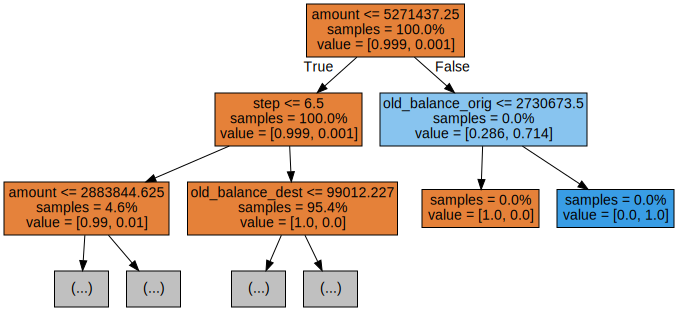

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d0c0e9f3370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d0c0e9f1630>})

In [ ]:
# Create a variable for the best model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

# Use the best model to make predictions
y_pred_best = best_rf.predict(X_test)

# Now, you can evaluate the performance of the best model using various metrics such as confusion matrix and classification report


Best hyperparameters: {'max_depth': 12, 'n_estimators': 120}


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31062
         1.0       1.00      0.50      0.67        20

    accuracy                           1.00     31082
   macro avg       1.00      0.75      0.83     31082
weighted avg       1.00      1.00      1.00     31082



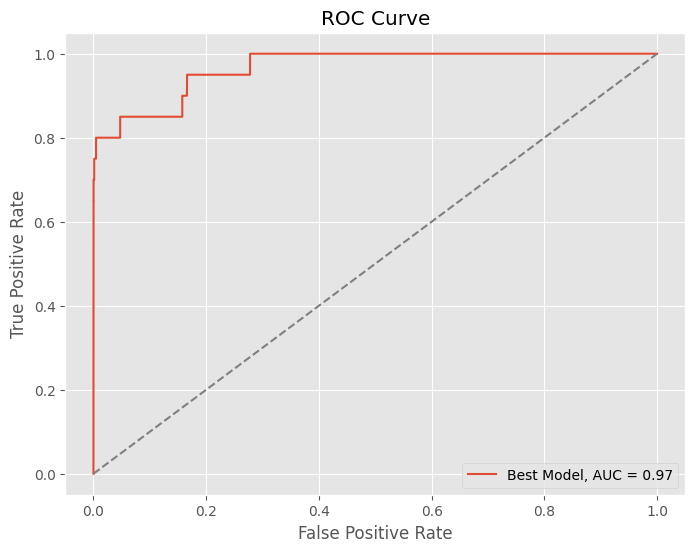

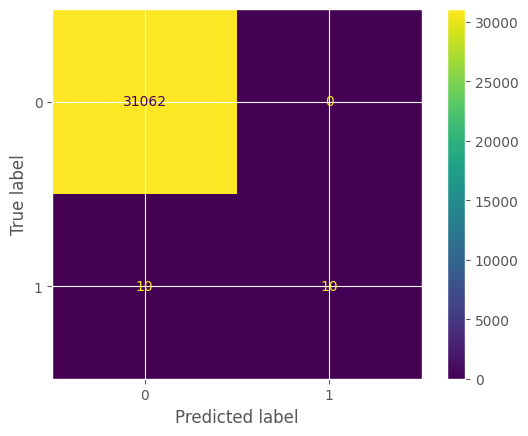

In [ ]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Classification Report
class_report_best = classification_report(y_test, y_pred_best)
print("Classification Report:")
print(class_report_best)

# ROC curve and ROC AUC score
y_pred_proba_best = best_rf.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, label='Best Model, AUC = {:.2f}'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Visualization
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


<Axes: >

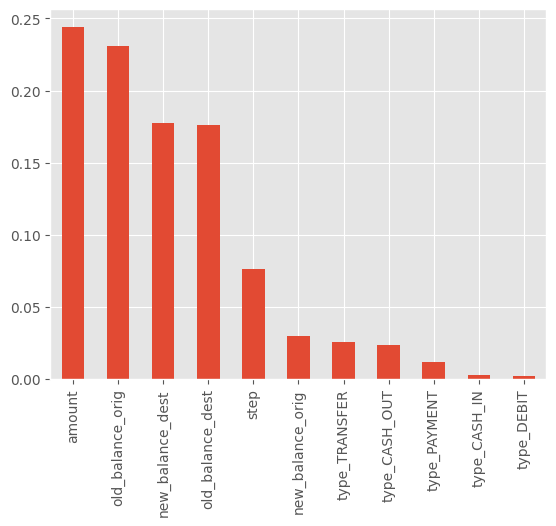

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

**Random forest on train after smote**

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier on the SMOTE-balanced training data
rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf.predict(X_train)

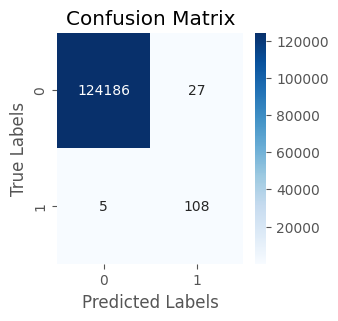

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    124213
         1.0       0.80      0.96      0.87       113

    accuracy                           1.00    124326
   macro avg       0.90      0.98      0.94    124326
weighted avg       1.00      1.00      1.00    124326



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(y_train, y_pred)
print(report)

**Random Forest on test after smote**

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier on the SMOTE-balanced training data
rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31062
         1.0       1.00      0.50      0.67        20

    accuracy                           1.00     31082
   macro avg       1.00      0.75      0.83     31082
weighted avg       1.00      1.00      1.00     31082



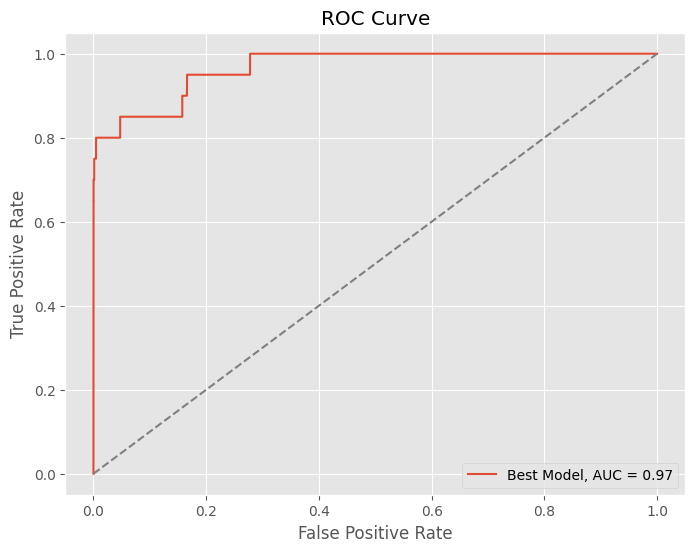

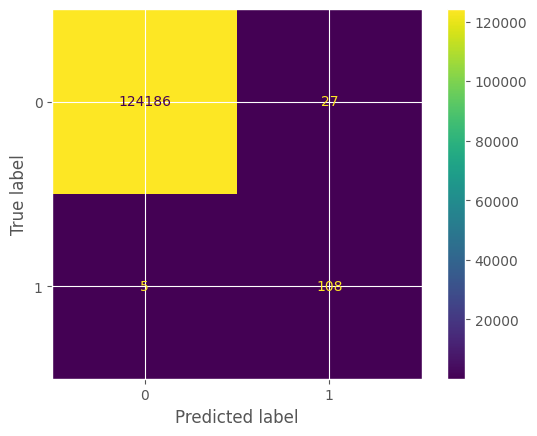

In [ ]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Classification Report
class_report_best = classification_report(y_test, y_pred_best)
print("Classification Report:")
print(class_report_best)

# ROC curve and ROC AUC score
y_pred_proba_best = best_rf.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, label='Best Model, AUC = {:.2f}'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Visualization
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


**Ridge regression**

**after smote**

In [ ]:
from sklearn.linear_model import Ridge

# Create a Ridge regression modelas
ridge = Ridge(alpha=1)  #this is the lambda value

# Fit the data
ridge.fit(X_train_smote, y_train_smote)
yhat_ridge = ridge.predict(X_test)

# Obtain R-squared
score = ridge.score(X_train_smote, y_train_smote)

# Print R-squared
print(score)

0.6612982853455919


In [ ]:
score2 = ridge.score(X_test, y_test)
print(score2)

-146.4437213036522


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31062
         1.0       0.83      0.95      0.88        20

    accuracy                           1.00     31082
   macro avg       0.91      0.97      0.94     31082
weighted avg       1.00      1.00      1.00     31082

Confusion Matrix:
[[31058     4]
 [    1    19]]


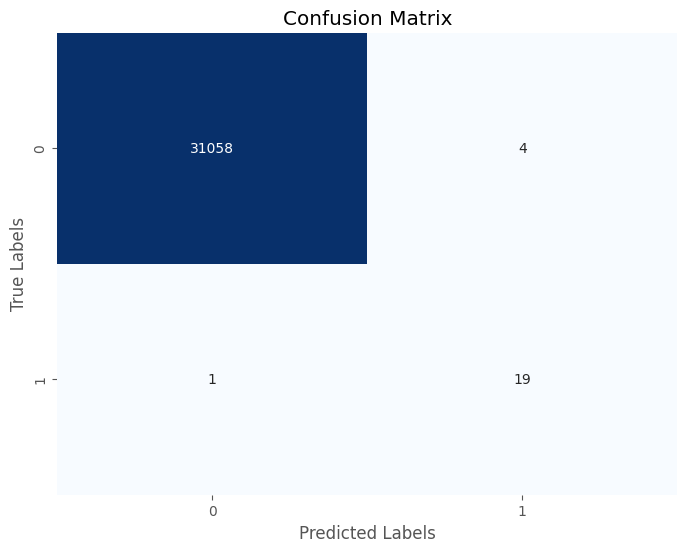

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the data
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
